In [1]:
# Configuración inicial del proyecto
import sys
import os

# Añadir directorio padre al path para importar módulos locales
sys.path.append('..')

# Importaciones básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("Entorno configurado correctamente")
print(f"Pandas versión: {pd.__version__}")
print(f"NumPy versión: {np.__version__}")
print(f"Matplotlib configurado")
print(f"Directorio de trabajo: {os.getcwd()}")

Entorno configurado correctamente
Pandas versión: 2.2.3
NumPy versión: 2.0.2
Matplotlib configurado
Directorio de trabajo: C:\Users\olimp\Documents\mortalidad_materna_proyecto\notebooks


In [2]:
# Verificar estructura de proyecto
import os

directorios = ['../datos/raw', '../datos/processed', '../datos/shapefiles_qgis', 
               '../results/figuras', '../results/mapas']

print("Verificando estructura de directorios:")
for directorio in directorios:
    if os.path.exists(directorio):
        print(f"{directorio}")
    else:
        print(f"{directorio} - FALTA")
        os.makedirs(directorio, exist_ok=True)
        print(f"   → Creado automáticamente")

print("\nEstructura de proyecto lista")

Verificando estructura de directorios:
../datos/raw
../datos/processed
../datos/shapefiles_qgis
../results/figuras
../results/mapas
../docs

Estructura de proyecto lista


In [3]:
def cargar_datos_mortalidad(ruta_archivo):
    """
    Carga los datos de mortalidad materna desde archivo Excel
    
    Parameters:
    ruta_archivo (str): Ruta al archivo Excel
    
    Returns:
    pd.DataFrame: DataFrame con los datos cargados
    """
    try:
        # Cargar datos
        df = pd.read_excel(ruta_archivo)
        
        print(f"Datos cargados exitosamente")
        print(f"Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
        print(f"Periodo: {df['ANIO_DEFUNCION'].min()}-{df['ANIO_DEFUNCION'].max()}")
        print(f"Entidades: {df['ENTIDAD_OCURRENCIAD'].nunique()} diferentes")
        
        return df
    
    except FileNotFoundError:
        print(f"Error: No se encontró el archivo {ruta_archivo}")
        print("Asegúrate de que el archivo esté en la carpeta datos/raw/")
        return None
    
    except Exception as e:
        print(f"Error al cargar datos: {e}")
        return None

# Ejemplo de uso
df = cargar_datos_mortalidad('../datos/raw/mortalidad_materna_2002_2022.xlsx')

Datos cargados exitosamente
Dimensiones: 23,278 filas × 58 columnas
Periodo: 0-2022
Entidades: 33 diferentes


In [4]:
# Verificar que las librerías geoespaciales funcionan
test_exitoso = False

try:
    import geopandas as gpd
    import folium
    print("GeoPandas importado correctamente")
    print("Folium importado correctamente")
    
    # Test básico de GeoPandas con datos alternativos
    try:
        # Método 1: Crear datos de prueba simples
        from shapely.geometry import Point, Polygon
        import pandas as pd
        
        # Crear geometrías de prueba para México
        puntos_mexico = [
            Point(-99.1332, 19.4326),  # Ciudad de México
            Point(-103.3496, 20.6597), # Guadalajara
            Point(-100.3161, 25.6866)  # Monterrey
        ]
        
        ciudades = ['Ciudad de México', 'Guadalajara', 'Monterrey']
        
        # Crear GeoDataFrame de prueba
        gdf_test = gpd.GeoDataFrame({
            'ciudad': ciudades,
            'geometry': puntos_mexico
        }, crs='EPSG:4326')
        
        print(f"GeoDataFrame de prueba creado: {len(gdf_test)} ciudades")
        print("Datos geográficos de prueba cargados")
        
    except Exception as e:
        print(f"Método 1 falló: {e}")
        
        # Método 2: Datos de prueba más simples
        print("Probando método alternativo...")
        
        # Crear polígono simple de México (aproximado)
        mexico_bounds = Polygon([
            (-118, 32), (-118, 14), (-86, 14), (-86, 32), (-118, 32)
        ])
        
        gdf_test = gpd.GeoDataFrame({
            'pais': ['México'],
            'geometry': [mexico_bounds]
        }, crs='EPSG:4326')
        
        print("Datos geográficos básicos creados")
    
    # Test básico de mapa con Folium
    try:
        # Crear mapa centrado en México
        m = folium.Map(
            location=[23.6345, -102.5528],  # Centro de México
            zoom_start=5,
            tiles='OpenStreetMap'
        )
        
        # Añadir un marcador de prueba
        folium.Marker(
            [19.4326, -99.1332],  # Ciudad de México
            popup='Ciudad de México - Test',
            tooltip='¡Mapa funcionando!'
        ).add_to(m)
        
        print("Mapa base creado correctamente")
        print("Marcador de prueba añadido")
        
        # Guardar mapa de prueba
        m.save('../results/mapas/test_mapa.html')
        print("Mapa guardado en: results/mapas/test_mapa.html")
        
        test_exitoso = True
        
    except Exception as e:
        print(f"Error creando mapa: {e}")
        test_exitoso = False
    
    if test_exitoso:
        print("\nCapacidades geoespaciales verificadas EXITOSAMENTE")
        print("GeoPandas y Folium funcionan perfectamente")
    else:
        print("\nFalló el test de mapas")
    
except ImportError as e:
    print(f"Error en librerías geoespaciales: {e}")
    print("Ejecuta: conda install -c conda-forge geopandas folium")
    test_exitoso = False
    
except Exception as e:
    print(f"Error inesperado: {e}")
    test_exitoso = False

print(f"\nResultado final del test: {'EXITOSO' if test_exitoso else 'FALLÓ'}")

GeoPandas importado correctamente
Folium importado correctamente
GeoDataFrame de prueba creado: 3 ciudades
Datos geográficos de prueba cargados
Mapa base creado correctamente
Marcador de prueba añadido
Mapa guardado en: results/mapas/test_mapa.html

Capacidades geoespaciales verificadas EXITOSAMENTE
GeoPandas y Folium funcionan perfectamente

Resultado final del test: EXITOSO


In [6]:
# Verificar entorno completo

def verificar_entorno_completo():
    """
    Verifica que todo el entorno esté configurado correctamente
    """
    print("VERIFICACIÓN COMPLETA DEL ENTORNO")
    print("="*50)
    
    # 1. Librerías básicas
    try:
        import pandas as pd
        import numpy as np
        import matplotlib.pyplot as plt
        import seaborn as sns
        print("Librerías básicas: OK")
    except ImportError:
        print("Librerías básicas: FALTAN")
        return False
    
    # 2. Librerías geoespaciales
    try:
        import geopandas as gpd
        import folium
        print("Librerías geoespaciales: OK")
    except ImportError:
        print("Librerías geoespaciales: FALTAN")
        return False
    
    # 3. Estructura de directorios
    directorios_requeridos = ['../datos/raw', '../datos/processed', '../results/figuras']
    todos_directorios = all(os.path.exists(d) for d in directorios_requeridos)
    if todos_directorios:
        print("Estructura de directorios: OK")
    else:
        print("Estructura de directorios: INCOMPLETA")
    
    # 4. Capacidad de crear gráficos
    try:
        fig, ax = plt.subplots(1, 1, figsize=(6, 4))
        ax.plot([1, 2, 3], [1, 4, 2])
        ax.set_title('Test Plot')
        plt.close(fig)
        print("Capacidad de gráficos: OK")
    except:
        print("Capacidad de gráficos: FALLA")
        return False
    
    print("="*50)
    print("ENTORNO COMPLETAMENTE CONFIGURADO")
    print("Listo para comenzar el análisis")
    return True

# Ejecutar verificación
verificar_entorno_completo()

VERIFICACIÓN COMPLETA DEL ENTORNO
Librerías básicas: OK
Librerías geoespaciales: OK
Estructura de directorios: OK
Capacidad de gráficos: OK
ENTORNO COMPLETAMENTE CONFIGURADO
Listo para comenzar el análisis


True

In [7]:
# Limpieza y Filtrado de Datos

print("="*60)
print("LIMPIEZA Y FILTRADO DE DATOS")
print("="*60)

# 1. ANÁLISIS DE DATOS ANTES DE LIMPIEZA
print("\n1. ANÁLISIS ANTES DE LIMPIEZA")
print("-" * 40)

print(f"Total de registros originales: {len(df):,}")

# Análizar años problemáticos
años_unicos = sorted(df['ANIO_DEFUNCION'].unique())
print(f"Años únicos en el dataset: {años_unicos}")

años_invalidos = df[(df['ANIO_DEFUNCION'] < 2002) | (df['ANIO_DEFUNCION'] > 2022)]
print(f"Registros con años inválidos: {len(años_invalidos)}")

# Analizar edades problemáticas
edades_unicas = sorted(df['EDAD'].unique())
print(f"Rango de edades en dataset: {min(edades_unicas)} - {max(edades_unicas)}")

edades_especiales = df[df['EDAD'].isin([998, 999])]
print(f"Registros con edad no especificada (998/999): {len(edades_especiales)}")

edades_invalidas = df[(df['EDAD'] < 10) | (df['EDAD'] > 60)]
edades_invalidas_sin_998 = edades_invalidas[~edades_invalidas['EDAD'].isin([998, 999])]
print(f"Registros con edades improbables (excluyendo 998/999): {len(edades_invalidas_sin_998)}")

# 2. APLICAR FILTROS DE LIMPIEZA
print("\n2. APLICANDO FILTROS DE LIMPIEZA")
print("-" * 40)

# Crear copia para limpieza
df_limpio = df.copy()

# Filtro 1: Años válidos (2002-2022)
antes_filtro_años = len(df_limpio)
df_limpio = df_limpio[(df_limpio['ANIO_DEFUNCION'] >= 2002) & 
                      (df_limpio['ANIO_DEFUNCION'] <= 2022)]
despues_filtro_años = len(df_limpio)
print(f"Filtro años (2002-2022): {antes_filtro_años:,} -> {despues_filtro_años:,} "
      f"(eliminados: {antes_filtro_años - despues_filtro_años:,})")

# Filtro 2: Edades válidas (10-60 años, manteniendo 998 como categoría especial)
antes_filtro_edad = len(df_limpio)
# Mantener edades entre 10-60 años Y los códigos 998 (no especificado)
df_limpio = df_limpio[((df_limpio['EDAD'] >= 10) & (df_limpio['EDAD'] <= 60)) | 
                      (df_limpio['EDAD'] == 998)]
despues_filtro_edad = len(df_limpio)
print(f"Filtro edades (10-60 años + 998): {antes_filtro_edad:,} -> {despues_filtro_edad:,} "
      f"(eliminados: {antes_filtro_edad - despues_filtro_edad:,})")

# 3. CREAR VARIABLES DE EDAD LIMPIA
print("\n3. CREANDO VARIABLES DE EDAD PROCESADA")
print("-" * 40)

# Crear nueva columna de edad procesada
df_limpio['EDAD_PROCESADA'] = df_limpio['EDAD'].copy()
df_limpio['EDAD_ESPECIFICADA'] = df_limpio['EDAD'] != 998

# Estadísticas de edad limpia (sin 998)
edades_especificadas = df_limpio[df_limpio['EDAD_ESPECIFICADA']]['EDAD']
edades_no_especificadas = df_limpio[~df_limpio['EDAD_ESPECIFICADA']]

print(f"Casos con edad especificada: {len(edades_especificadas):,} ({len(edades_especificadas)/len(df_limpio)*100:.1f}%)")
print(f"Casos con edad no especificada: {len(edades_no_especificadas):,} ({len(edades_no_especificadas)/len(df_limpio)*100:.1f}%)")

if len(edades_especificadas) > 0:
    print(f"Edad promedio (casos especificados): {edades_especificadas.mean():.1f} años")
    print(f"Edad mediana (casos especificados): {edades_especificadas.median():.1f} años")
    print(f"Rango de edad (casos especificados): {edades_especificadas.min()}-{edades_especificadas.max()} años")

# 4. VERIFICACIÓN FINAL
print("\n4. VERIFICACIÓN FINAL")
print("-" * 40)

print(f"Dataset original: {len(df):,} registros")
print(f"Dataset limpio: {len(df_limpio):,} registros")
print(f"Porcentaje retenido: {len(df_limpio)/len(df)*100:.1f}%")
print(f"Período final: {df_limpio['ANIO_DEFUNCION'].min()}-{df_limpio['ANIO_DEFUNCION'].max()}")
print(f"Entidades en dataset limpio: {df_limpio['ENTIDAD_OCURRENCIAD'].nunique()}")

# Mostrar distribución de años después de limpieza
casos_por_año_limpio = df_limpio['ANIO_DEFUNCION'].value_counts().sort_index()
print(f"\nDistribución por año (después de limpieza):")
for año, casos in casos_por_año_limpio.items():
    print(f"  {año}: {casos:,} casos")

# 5. GUARDAR DATASET LIMPIO
print("\n5. GUARDANDO DATASET LIMPIO")
print("-" * 40)

# Guardar dataset limpio
archivo_limpio = '../datos/processed/mortalidad_materna_limpio.xlsx'
df_limpio.to_excel(archivo_limpio, index=False)
print(f"Dataset limpio guardado en: {archivo_limpio}")

# Guardar solo casos con edad especificada (para análisis de edad)
df_edad_especificada = df_limpio[df_limpio['EDAD_ESPECIFICADA']].copy()
archivo_edad = '../datos/processed/mortalidad_materna_edad_especificada.xlsx'
df_edad_especificada.to_excel(archivo_edad, index=False)
print(f"Dataset con edades especificadas guardado en: {archivo_edad}")

print("\nLIMPIEZA COMPLETADA")
print("El dataset 'df_limpio' está listo para análisis posteriores")

LIMPIEZA Y FILTRADO DE DATOS

1. ANÁLISIS ANTES DE LIMPIEZA
----------------------------------------
Total de registros originales: 23,278
Años únicos en el dataset: [np.int64(0), np.int64(1914), np.int64(1934), np.int64(1937), np.int64(1938), np.int64(1943), np.int64(1944), np.int64(1948), np.int64(1949), np.int64(1950), np.int64(1951), np.int64(1953), np.int64(1954), np.int64(1956), np.int64(1957), np.int64(1958), np.int64(1959), np.int64(1961), np.int64(1962), np.int64(1963), np.int64(1964), np.int64(1965), np.int64(1966), np.int64(1967), np.int64(1968), np.int64(1969), np.int64(1970), np.int64(1971), np.int64(1972), np.int64(1973), np.int64(1974), np.int64(1975), np.int64(1976), np.int64(1977), np.int64(1978), np.int64(1979), np.int64(1980), np.int64(1982), np.int64(1984), np.int64(1985), np.int64(1986), np.int64(1987), np.int64(1988), np.int64(1989), np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.i

In [8]:
# Análisis Exploratorio Completo

print("="*60)
print("ANÁLISIS EXPLORATORIO COMPLETO - DATOS LIMPIOS")
print("="*60)

print(f"Analizando {len(df_limpio):,} casos de mortalidad materna (2002-2022)")

# 1. ANÁLISIS TEMPORAL 
print("\n1. ANÁLISIS TEMPORAL")
print("-" * 40)

casos_por_año = df_limpio['ANIO_DEFUNCION'].value_counts().sort_index()

# Calcular períodos 
años_primer_periodo = [2002, 2003, 2004, 2005]
casos_primer_periodo = [casos_por_año[año] for año in años_primer_periodo if año in casos_por_año.index]
primer_periodo = sum(casos_primer_periodo) / len(casos_primer_periodo)

años_ultimo_periodo = [2018, 2019]
casos_ultimo_periodo = [casos_por_año[año] for año in años_ultimo_periodo if año in casos_por_año.index]
ultimo_periodo = sum(casos_ultimo_periodo) / len(casos_ultimo_periodo)

años_covid = [2020, 2021]
casos_covid = [casos_por_año[año] for año in años_covid if año in casos_por_año.index]
promedio_covid = sum(casos_covid) / len(casos_covid)

reduccion_porcentual = ((primer_periodo - ultimo_periodo) / primer_periodo) * 100
incremento_covid = ((promedio_covid - ultimo_periodo) / ultimo_periodo) * 100

print(f"Promedio 2002-2005: {primer_periodo:.0f} casos/año")
print(f"Promedio 2018-2019: {ultimo_periodo:.0f} casos/año")
print(f"Reducción histórica: {reduccion_porcentual:.1f}%")
print(f"Promedio COVID (2020-2021): {promedio_covid:.0f} casos/año")
print(f"Incremento durante COVID-19: {incremento_covid:.1f}%")

# Identificar períodos clave
print(f"Mejor año: {casos_por_año.idxmin()} ({casos_por_año.min()} casos)")
print(f"Peor año: {casos_por_año.idxmax()} ({casos_por_año.max()} casos)")

# 2. ANÁLISIS GEOGRÁFICO
print("\n2. ANÁLISIS GEOGRÁFICO")
print("-" * 40)

casos_por_entidad = df_limpio['ENTIDAD_OCURRENCIAD'].value_counts()
print("Top 10 entidades con mayor mortalidad:")
for i, (entidad, casos) in enumerate(casos_por_entidad.head(10).items(), 1):
    porcentaje = (casos / len(df_limpio)) * 100
    tasa_anual = casos / 21  # 21 años de datos
    print(f"  {i:2d}. {entidad}: {casos:,} casos ({porcentaje:.1f}%, {tasa_anual:.0f}/año)")

# 3. ANÁLISIS SOCIODEMOGRÁFICO
print("\n3. ANÁLISIS SOCIODEMOGRÁFICO")
print("-" * 40)

edades_especificadas = df_limpio[df_limpio['EDAD_ESPECIFICADA']]['EDAD']
print(f"Edad promedio: {edades_especificadas.mean():.1f} años")
print(f"Edad mediana: {edades_especificadas.median():.1f} años")
print(f"Edad más frecuente: {edades_especificadas.mode().iloc[0]} años")

# Grupos de edad de alto riesgo
adolescentes = len(df_limpio[df_limpio['EDAD'] < 20])
jovenes = len(df_limpio[(df_limpio['EDAD'] >= 20) & (df_limpio['EDAD'] < 30)])
adultas = len(df_limpio[(df_limpio['EDAD'] >= 30) & (df_limpio['EDAD'] < 40)])

print(f"\nGrupos de riesgo:")
print(f"  Adolescentes (<20 años): {adolescentes:,} casos ({adolescentes/len(df_limpio)*100:.1f}%)")
print(f"  Jóvenes (20-29 años): {jovenes:,} casos ({jovenes/len(df_limpio)*100:.1f}%)")
print(f"  Adultas (30-39 años): {adultas:,} casos ({adultas/len(df_limpio)*100:.1f}%)")

# 4. CRISIS DE ACCESO A SERVICIOS
print("\n4. CRISIS DE ACCESO A SERVICIOS DE SALUD")
print("-" * 40)

sin_derechohabiencia = len(df_limpio[df_limpio['DERECHOHABIENCIAD'] == 'NINGUNA'])
muertes_hogar = len(df_limpio[df_limpio['SITIO_DEFUNCIOND'] == 'HOGAR'])
servicios_publicos = len(df_limpio[df_limpio['DERECHOHABIENCIAD'].isin(['IMSS', 'ISSSTE', 'SEGURO POPULAR'])])

print(f"Sin derechohabiencia: {sin_derechohabiencia:,} casos ({sin_derechohabiencia/len(df_limpio)*100:.1f}%)")
print(f"Muertes en el hogar: {muertes_hogar:,} casos ({muertes_hogar/len(df_limpio)*100:.1f}%)")
print(f"Con servicios públicos: {servicios_publicos:,} casos ({servicios_publicos/len(df_limpio)*100:.1f}%)")

# 5. EDUCACIÓN Y VULNERABILIDAD
print("\n5. EDUCACIÓN Y VULNERABILIDAD")
print("-" * 40)

sin_educacion = len(df_limpio[df_limpio['ESCOLARIDADD'] == 'NINGUNA'])
primaria_max = len(df_limpio[df_limpio['ESCOLARIDADD'].isin(['NINGUNA', 'PRIMARIA INCOMPLETA', 'PRIMARIA COMPLETA'])])
profesional = len(df_limpio[df_limpio['ESCOLARIDADD'] == 'PROFESIONAL'])

print(f"Sin educación: {sin_educacion:,} casos ({sin_educacion/len(df_limpio)*100:.1f}%)")
print(f"Máximo primaria: {primaria_max:,} casos ({primaria_max/len(df_limpio)*100:.1f}%)")
print(f"Educación profesional: {profesional:,} casos ({profesional/len(df_limpio)*100:.1f}%)")

# 6. PRINCIPALES CAUSAS MÉDICAS
print("\n6. PRINCIPALES CAUSAS MÉDICAS")
print("-" * 40)

causas = df_limpio['CAUSA_CIE_4D'].value_counts()
causas_prevenibles = ['ECLAMPSIA', 'PREECLAMPSIA', 'HEMORRAGIA']

print("Top 5 causas:")
for i, (causa, cantidad) in enumerate(causas.head(5).items(), 1):
    porcentaje = (cantidad / len(df_limpio)) * 100
    es_prevenible = any(term in causa.upper() for term in causas_prevenibles)
    estado = "(PREVENIBLE)" if es_prevenible else ""
    print(f"  {i}. {causa.split(' ')[0]} - {' '.join(causa.split(' ')[1:4])}... {estado}")
    print(f"     {cantidad:,} casos ({porcentaje:.1f}%)")

print("\nANÁLISIS EXPLORATORIO COMPLETADO")

ANÁLISIS EXPLORATORIO COMPLETO - DATOS LIMPIOS
Analizando 23,133 casos de mortalidad materna (2002-2022)

1. ANÁLISIS TEMPORAL
----------------------------------------
Promedio 2002-2005: 1306 casos/año
Promedio 2018-2019: 878 casos/año
Reducción histórica: 32.8%
Promedio COVID (2020-2021): 1226 casos/año
Incremento durante COVID-19: 39.7%
Mejor año: 2019 (866 casos)
Peor año: 2003 (1343 casos)

2. ANÁLISIS GEOGRÁFICO
----------------------------------------
Top 10 entidades con mayor mortalidad:
   1. MÉXICO: 2,551 casos (11.0%, 121/año)
   2. CIUDAD DE MÉXICO: 2,392 casos (10.3%, 114/año)
   3. CHIAPAS: 1,567 casos (6.8%, 75/año)
   4. VERACRUZ DE IGNACIO DE LA LLAVE: 1,543 casos (6.7%, 73/año)
   5. PUEBLA: 1,351 casos (5.8%, 64/año)
   6. JALISCO: 1,237 casos (5.3%, 59/año)
   7. GUERRERO: 1,154 casos (5.0%, 55/año)
   8. OAXACA: 1,089 casos (4.7%, 52/año)
   9. GUANAJUATO: 938 casos (4.1%, 45/año)
  10. CHIHUAHUA: 881 casos (3.8%, 42/año)

3. ANÁLISIS SOCIODEMOGRÁFICO
------------

RESULTADOS DETALLADOS DEL ANÁLISIS

DATOS GENERALES:
Total de casos analizados: 23,133
Período de análisis: 2002-2022 (21 años)
Porcentaje de datos originales conservados: 99.4%

1. ANÁLISIS TEMPORAL:
   Promedio 2002-2005: 1306 casos/año
   Promedio 2018-2019: 878 casos/año
   Reducción histórica: 32.8%
   Promedio COVID (2020-2021): 1226 casos/año
   Incremento durante COVID-19: 39.7%
   Mejor año: 2019 (866 casos)
   Peor año: 2003 (1343 casos)

2. ANÁLISIS GEOGRÁFICO:
   Entidades con casos registrados: 33
   Top 10 entidades:
    1. MÉXICO: 2,551 casos (11.0%, 121/año)
    2. CIUDAD DE MÉXICO: 2,392 casos (10.3%, 114/año)
    3. CHIAPAS: 1,567 casos (6.8%, 75/año)
    4. VERACRUZ DE IGNACIO DE LA LLAVE: 1,543 casos (6.7%, 73/año)
    5. PUEBLA: 1,351 casos (5.8%, 64/año)
    6. JALISCO: 1,237 casos (5.3%, 59/año)
    7. GUERRERO: 1,154 casos (5.0%, 55/año)
    8. OAXACA: 1,089 casos (4.7%, 52/año)
    9. GUANAJUATO: 938 casos (4.1%, 45/año)
   10. CHIHUAHUA: 881 casos (3.8%, 42/añ

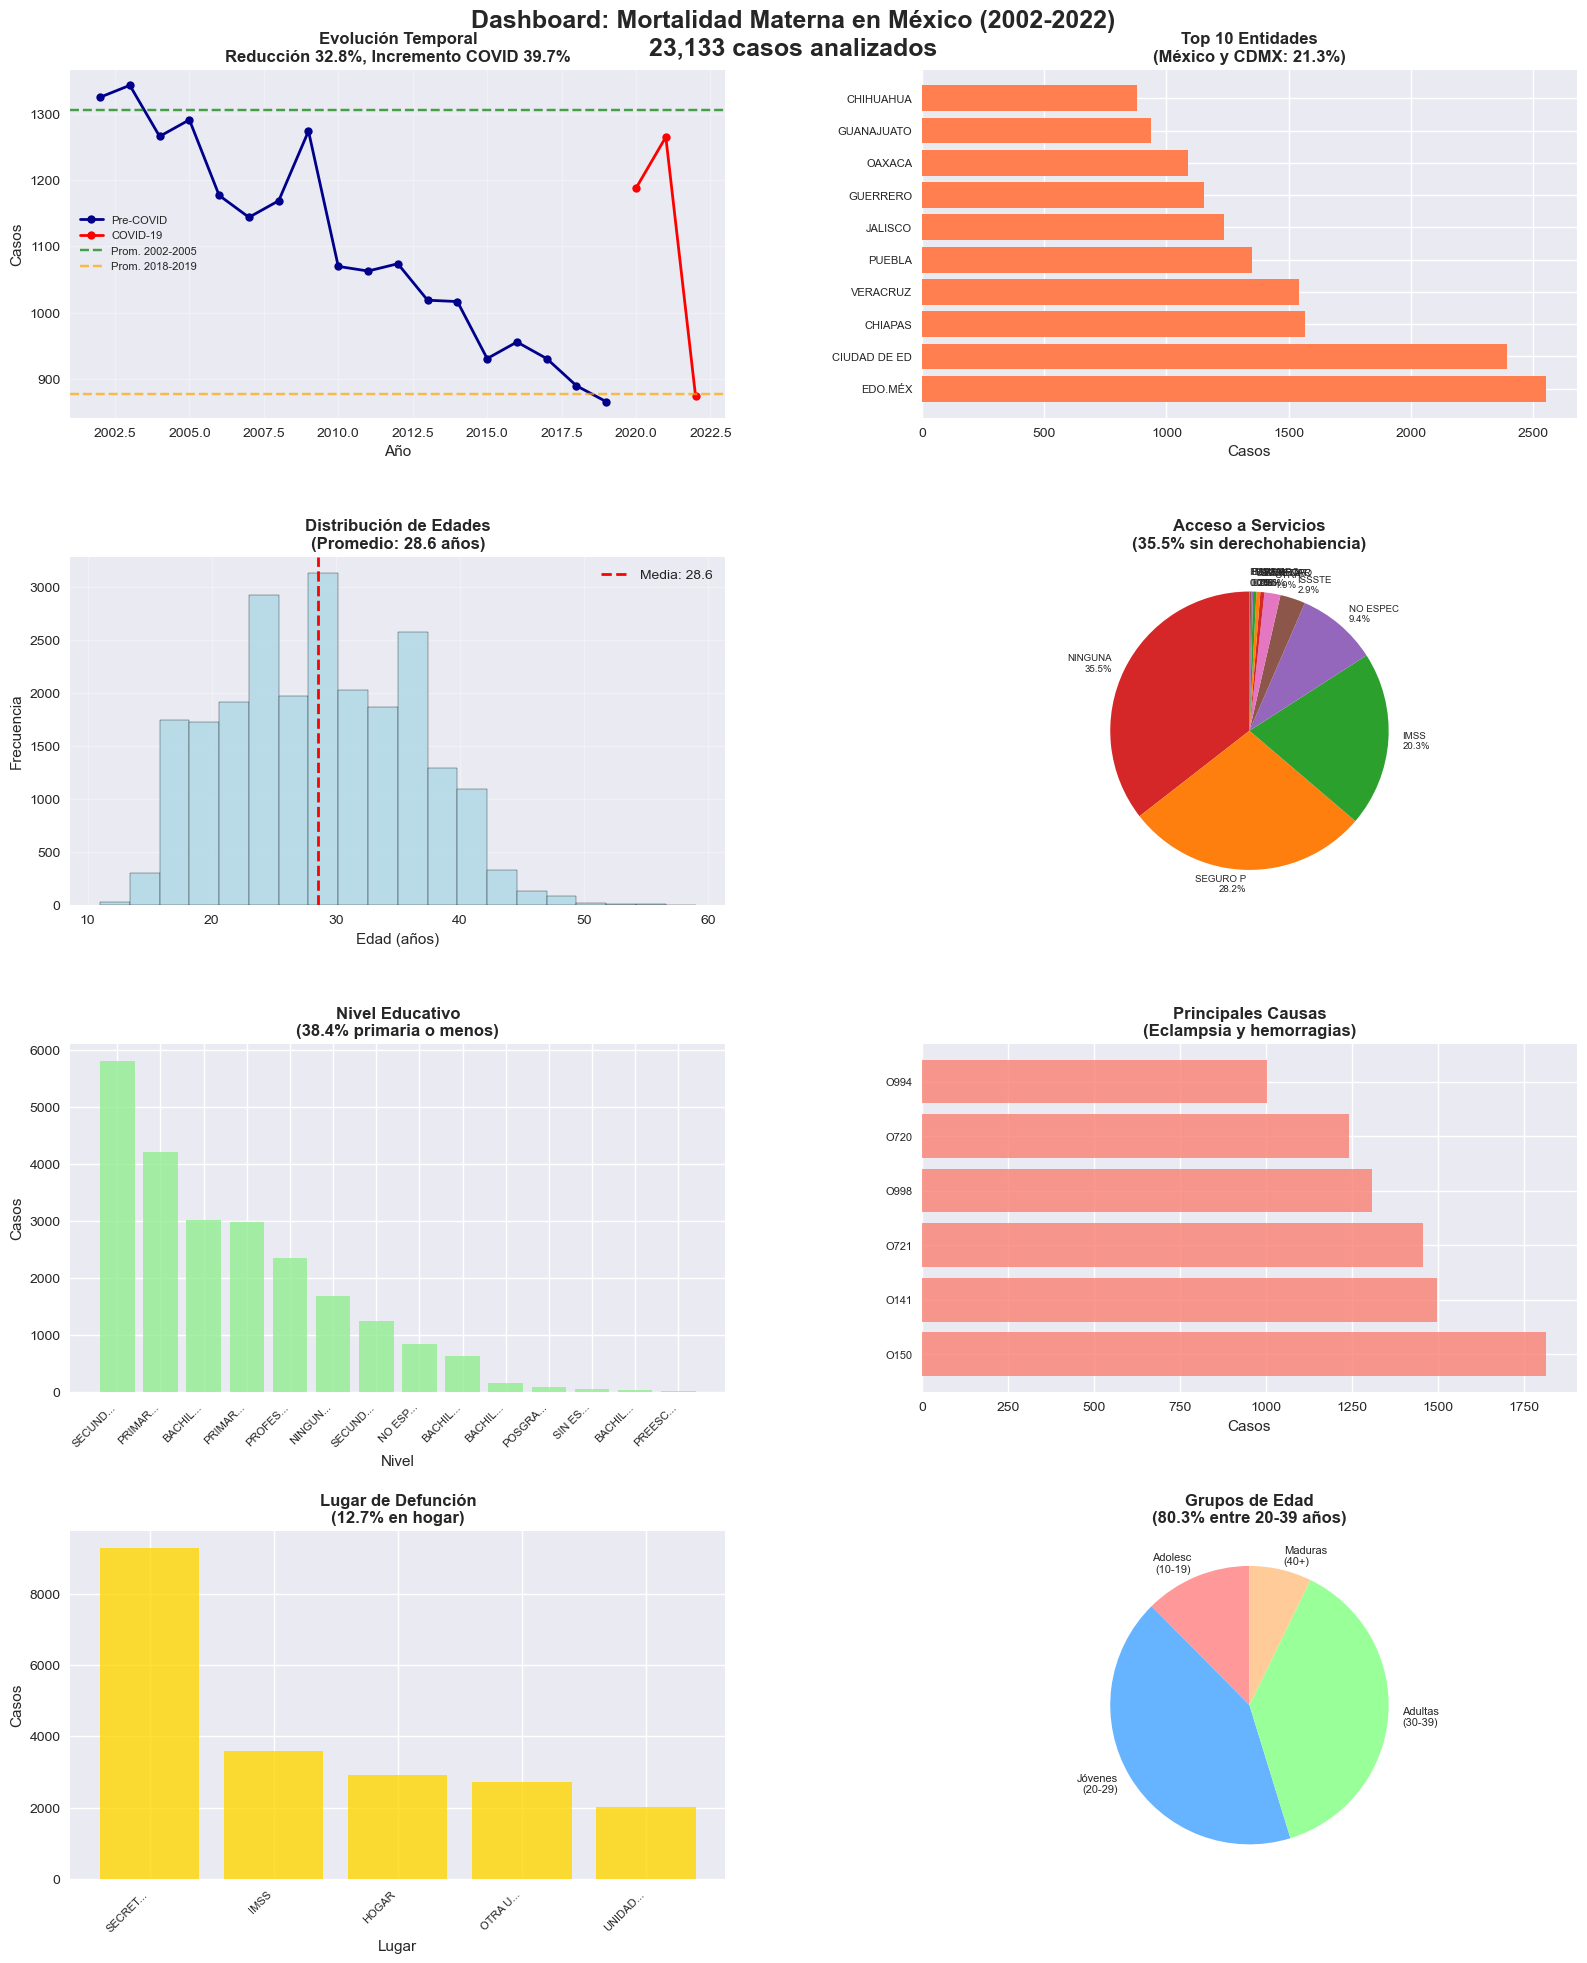


Visualizaciones completadas y guardadas en:
results/figuras/dashboard_completo_con_resultados.png

ANÁLISIS EXPLORATORIO COMPLETADO


In [10]:
# Dashboard con Resultados

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("="*60)
print("RESULTADOS DETALLADOS DEL ANÁLISIS")
print("="*60)

# IMPRIMIR TODOS LOS RESULTADOS NUMÉRICOS 
print(f"\nDATOS GENERALES:")
print(f"Total de casos analizados: {len(df_limpio):,}")
print(f"Período de análisis: 2002-2022 (21 años)")
print(f"Porcentaje de datos originales conservados: {len(df_limpio)/len(df)*100:.1f}%")

# 1. RESULTADOS TEMPORALES
print(f"\n1. ANÁLISIS TEMPORAL:")
casos_por_año = df_limpio['ANIO_DEFUNCION'].value_counts().sort_index()

años_primer_periodo = [2002, 2003, 2004, 2005]
casos_primer_periodo = [casos_por_año[año] for año in años_primer_periodo if año in casos_por_año.index]
primer_periodo = sum(casos_primer_periodo) / len(casos_primer_periodo)

años_ultimo_periodo = [2018, 2019]
casos_ultimo_periodo = [casos_por_año[año] for año in años_ultimo_periodo if año in casos_por_año.index]
ultimo_periodo = sum(casos_ultimo_periodo) / len(casos_ultimo_periodo)

años_covid = [2020, 2021]
casos_covid = [casos_por_año[año] for año in años_covid if año in casos_por_año.index]
promedio_covid = sum(casos_covid) / len(casos_covid)

reduccion_porcentual = ((primer_periodo - ultimo_periodo) / primer_periodo) * 100
incremento_covid = ((promedio_covid - ultimo_periodo) / ultimo_periodo) * 100

print(f"   Promedio 2002-2005: {primer_periodo:.0f} casos/año")
print(f"   Promedio 2018-2019: {ultimo_periodo:.0f} casos/año")
print(f"   Reducción histórica: {reduccion_porcentual:.1f}%")
print(f"   Promedio COVID (2020-2021): {promedio_covid:.0f} casos/año")
print(f"   Incremento durante COVID-19: {incremento_covid:.1f}%")
print(f"   Mejor año: {casos_por_año.idxmin()} ({casos_por_año.min()} casos)")
print(f"   Peor año: {casos_por_año.idxmax()} ({casos_por_año.max()} casos)")

# 2. RESULTADOS GEOGRÁFICOS
print(f"\n2. ANÁLISIS GEOGRÁFICO:")
casos_por_entidad = df_limpio['ENTIDAD_OCURRENCIAD'].value_counts()
print(f"   Entidades con casos registrados: {len(casos_por_entidad)}")
print("   Top 10 entidades:")
for i, (entidad, casos) in enumerate(casos_por_entidad.head(10).items(), 1):
    porcentaje = (casos / len(df_limpio)) * 100
    tasa_anual = casos / 21
    print(f"   {i:2d}. {entidad}: {casos:,} casos ({porcentaje:.1f}%, {tasa_anual:.0f}/año)")

# 3. RESULTADOS SOCIODEMOGRÁFICOS
print(f"\n3. ANÁLISIS SOCIODEMOGRÁFICO:")
edades_especificadas = df_limpio[df_limpio['EDAD_ESPECIFICADA']]['EDAD']
print(f"   Casos con edad especificada: {len(edades_especificadas):,} ({len(edades_especificadas)/len(df_limpio)*100:.1f}%)")
print(f"   Edad promedio: {edades_especificadas.mean():.1f} años")
print(f"   Edad mediana: {edades_especificadas.median():.1f} años")
print(f"   Edad más frecuente: {edades_especificadas.mode().iloc[0]} años")
print(f"   Rango de edad: {edades_especificadas.min()}-{edades_especificadas.max()} años")

adolescentes = len(df_limpio[df_limpio['EDAD'] < 20])
jovenes = len(df_limpio[(df_limpio['EDAD'] >= 20) & (df_limpio['EDAD'] < 30)])
adultas = len(df_limpio[(df_limpio['EDAD'] >= 30) & (df_limpio['EDAD'] < 40)])
print(f"   Grupos de edad:")
print(f"     Adolescentes (<20 años): {adolescentes:,} casos ({adolescentes/len(df_limpio)*100:.1f}%)")
print(f"     Jóvenes (20-29 años): {jovenes:,} casos ({jovenes/len(df_limpio)*100:.1f}%)")
print(f"     Adultas (30-39 años): {adultas:,} casos ({adultas/len(df_limpio)*100:.1f}%)")

# 4. RESULTADOS DE ACCESO A SERVICIOS
print(f"\n4. ACCESO A SERVICIOS DE SALUD:")
sin_derechohabiencia = len(df_limpio[df_limpio['DERECHOHABIENCIAD'] == 'NINGUNA'])
muertes_hogar = len(df_limpio[df_limpio['SITIO_DEFUNCIOND'] == 'HOGAR'])
servicios_publicos = len(df_limpio[df_limpio['DERECHOHABIENCIAD'].isin(['IMSS', 'ISSSTE', 'SEGURO POPULAR'])])

print(f"   Sin derechohabiencia: {sin_derechohabiencia:,} casos ({sin_derechohabiencia/len(df_limpio)*100:.1f}%)")
print(f"   Con servicios públicos: {servicios_publicos:,} casos ({servicios_publicos/len(df_limpio)*100:.1f}%)")
print(f"   Muertes en el hogar: {muertes_hogar:,} casos ({muertes_hogar/len(df_limpio)*100:.1f}%)")

derechohabiencia = df_limpio['DERECHOHABIENCIAD'].value_counts()
print("   Distribución por tipo de derechohabiencia:")
for tipo, cantidad in derechohabiencia.head(6).items():
    porcentaje = (cantidad / len(df_limpio)) * 100
    print(f"     {tipo}: {cantidad:,} casos ({porcentaje:.1f}%)")

# 5. RESULTADOS DE EDUCACIÓN
print(f"\n5. ANÁLISIS DE EDUCACIÓN:")
sin_educacion = len(df_limpio[df_limpio['ESCOLARIDADD'] == 'NINGUNA'])
primaria_max = len(df_limpio[df_limpio['ESCOLARIDADD'].isin(['NINGUNA', 'PRIMARIA INCOMPLETA', 'PRIMARIA COMPLETA'])])
profesional = len(df_limpio[df_limpio['ESCOLARIDADD'] == 'PROFESIONAL'])

print(f"   Sin educación: {sin_educacion:,} casos ({sin_educacion/len(df_limpio)*100:.1f}%)")
print(f"   Máximo primaria: {primaria_max:,} casos ({primaria_max/len(df_limpio)*100:.1f}%)")
print(f"   Educación profesional: {profesional:,} casos ({profesional/len(df_limpio)*100:.1f}%)")

escolaridad = df_limpio['ESCOLARIDADD'].value_counts()
print("   Distribución por nivel educativo:")
for nivel, cantidad in escolaridad.head(7).items():
    porcentaje = (cantidad / len(df_limpio)) * 100
    print(f"     {nivel}: {cantidad:,} casos ({porcentaje:.1f}%)")

# 6. RESULTADOS DE CAUSAS MÉDICAS
print(f"\n6. PRINCIPALES CAUSAS MÉDICAS:")
causas = df_limpio['CAUSA_CIE_4D'].value_counts()
print("   Top 8 causas:")
for i, (causa, cantidad) in enumerate(causas.head(8).items(), 1):
    porcentaje = (cantidad / len(df_limpio)) * 100
    print(f"   {i}. {causa}")
    print(f"      {cantidad:,} casos ({porcentaje:.1f}%)")

# 7. RESULTADOS DE LUGAR DE DEFUNCIÓN
print(f"\n7. LUGAR DE DEFUNCIÓN:")
sitio_defuncion = df_limpio['SITIO_DEFUNCIOND'].value_counts()
print("   Distribución por lugar:")
for lugar, cantidad in sitio_defuncion.head(6).items():
    porcentaje = (cantidad / len(df_limpio)) * 100
    print(f"     {lugar}: {cantidad:,} casos ({porcentaje:.1f}%)")

print("\n" + "="*60)
print("GENERANDO VISUALIZACIONES...")
print("="*60)

# VISUALIZACIONES 
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
fig.suptitle('Dashboard: Mortalidad Materna en México (2002-2022)\n23,133 casos analizados', 
             fontsize=18, fontweight='bold', y=0.98)

# 1. EVOLUCIÓN TEMPORAL
ax1 = axes[0, 0]
años_pre_covid = casos_por_año[casos_por_año.index <= 2019]
años_covid = casos_por_año[casos_por_año.index >= 2020]

ax1.plot(años_pre_covid.index, años_pre_covid.values, 'o-', 
         linewidth=2, markersize=6, color='darkblue', label='Pre-COVID')
ax1.plot(años_covid.index, años_covid.values, 'o-', 
         linewidth=2, markersize=6, color='red', label='COVID-19')

ax1.axhline(y=1306, color='green', linestyle='--', alpha=0.7, label='Prom. 2002-2005')
ax1.axhline(y=878, color='orange', linestyle='--', alpha=0.7, label='Prom. 2018-2019')

ax1.set_title('Evolución Temporal\nReducción 32.8%, Incremento COVID 39.7%', fontweight='bold')
ax1.set_xlabel('Año')
ax1.set_ylabel('Casos')
ax1.legend(fontsize=8)
ax1.grid(True, alpha=0.3)

# 2. TOP 10 ENTIDADES
ax2 = axes[0, 1]
casos_por_entidad = df_limpio['ENTIDAD_OCURRENCIAD'].value_counts().head(10)
entidades_cortas = [e.replace(' DE IGNACIO DE LA LLAVE', '').replace('MÉXICO', 'EDO.MÉX')[:12] 
                    for e in casos_por_entidad.index]

bars = ax2.barh(range(len(casos_por_entidad)), casos_por_entidad.values, color='coral')
ax2.set_title('Top 10 Entidades\n(México y CDMX: 21.3%)', fontweight='bold')
ax2.set_xlabel('Casos')
ax2.set_yticks(range(len(casos_por_entidad)))
ax2.set_yticklabels(entidades_cortas, fontsize=8)

# 3. DISTRIBUCIÓN DE EDADES
ax3 = axes[1, 0]
ax3.hist(edades_especificadas, bins=20, color='lightblue', alpha=0.8, edgecolor='black')
ax3.axvline(edades_especificadas.mean(), color='red', linestyle='--', linewidth=2,
            label=f'Media: {edades_especificadas.mean():.1f}')
ax3.set_title('Distribución de Edades\n(Promedio: 28.6 años)', fontweight='bold')
ax3.set_xlabel('Edad (años)')
ax3.set_ylabel('Frecuencia')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. ACCESO A SERVICIOS
ax4 = axes[1, 1]
derechohabiencia = df_limpio['DERECHOHABIENCIAD'].value_counts()
colores_acceso = ['#d62728', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b', '#e377c2']

labels_simples = []
for tipo, cantidad in derechohabiencia.items():
    porcentaje = (cantidad / len(df_limpio)) * 100
    label = f'{tipo[:8]}\n{porcentaje:.1f}%'
    labels_simples.append(label)

wedges, texts = ax4.pie(derechohabiencia.values, 
                        labels=labels_simples,
                        colors=colores_acceso,
                        startangle=90,
                        textprops={'fontsize': 7})
ax4.set_title('Acceso a Servicios\n(35.5% sin derechohabiencia)', fontweight='bold')

# 5. NIVEL EDUCATIVO
ax5 = axes[2, 0]
escolaridad = df_limpio['ESCOLARIDADD'].value_counts()
bars = ax5.bar(range(len(escolaridad)), escolaridad.values, color='lightgreen', alpha=0.8)
ax5.set_title('Nivel Educativo\n(38.4% primaria o menos)', fontweight='bold')
ax5.set_xlabel('Nivel')
ax5.set_ylabel('Casos')
ax5.set_xticks(range(len(escolaridad)))
ax5.set_xticklabels([e[:6]+'...' if len(e)>6 else e for e in escolaridad.index], 
                    rotation=45, ha='right', fontsize=8)

# 6. PRINCIPALES CAUSAS
ax6 = axes[2, 1]
causas = df_limpio['CAUSA_CIE_4D'].value_counts().head(6)
causas_cortas = [f"{c.split(' ')[0]}" for c in causas.index]

bars = ax6.barh(range(len(causas)), causas.values, color='salmon', alpha=0.8)
ax6.set_title('Principales Causas\n(Eclampsia y hemorragias)', fontweight='bold')
ax6.set_xlabel('Casos')
ax6.set_yticks(range(len(causas)))
ax6.set_yticklabels(causas_cortas, fontsize=8)

# 7. LUGAR DE DEFUNCIÓN
ax7 = axes[3, 0]
sitio_defuncion = df_limpio['SITIO_DEFUNCIOND'].value_counts().head(5)
bars = ax7.bar(range(len(sitio_defuncion)), sitio_defuncion.values, color='gold', alpha=0.8)
ax7.set_title('Lugar de Defunción\n(12.7% en hogar)', fontweight='bold')
ax7.set_xlabel('Lugar')
ax7.set_ylabel('Casos')
ax7.set_xticks(range(len(sitio_defuncion)))
ax7.set_xticklabels([s[:6]+'...' if len(s)>6 else s for s in sitio_defuncion.index], 
                    rotation=45, ha='right', fontsize=8)

# 8. GRUPOS DE EDAD
ax8 = axes[3, 1]
grupos_edades = {
    'Adolesc\n(10-19)': len(df_limpio[(df_limpio['EDAD'] >= 10) & (df_limpio['EDAD'] < 20)]),
    'Jóvenes\n(20-29)': len(df_limpio[(df_limpio['EDAD'] >= 20) & (df_limpio['EDAD'] < 30)]),
    'Adultas\n(30-39)': len(df_limpio[(df_limpio['EDAD'] >= 30) & (df_limpio['EDAD'] < 40)]),
    'Maduras\n(40+)': len(df_limpio[df_limpio['EDAD'] >= 40])
}

colores_edad = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
wedges, texts = ax8.pie(list(grupos_edades.values()), 
                        labels=list(grupos_edades.keys()),
                        colors=colores_edad,
                        startangle=90,
                        textprops={'fontsize': 8})
ax8.set_title('Grupos de Edad\n(80.3% entre 20-39 años)', fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.4, wspace=0.3)
plt.savefig('../results/figuras/dashboard_completo_con_resultados.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\nVisualizaciones completadas y guardadas en:")
print("results/figuras/dashboard_completo_con_resultados.png")

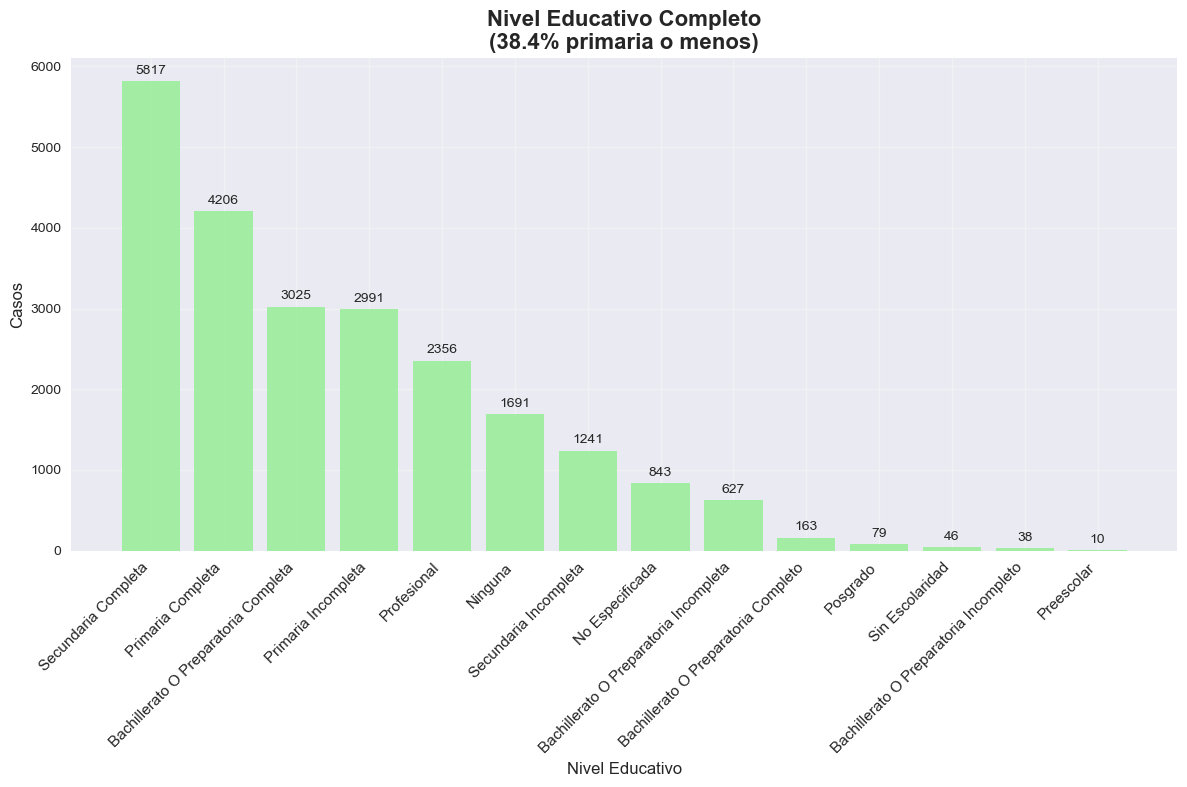

NIVEL EDUCATIVO (orden descendente):
 1. SECUNDARIA COMPLETA: 5,817 casos (25.1%)
 2. PRIMARIA COMPLETA: 4,206 casos (18.2%)
 3. BACHILLERATO O PREPARATORIA COMPLETA: 3,025 casos (13.1%)
 4. PRIMARIA INCOMPLETA: 2,991 casos (12.9%)
 5. PROFESIONAL: 2,356 casos (10.2%)
 6. NINGUNA: 1,691 casos (7.3%)
 7. SECUNDARIA INCOMPLETA: 1,241 casos (5.4%)
 8. NO ESPECIFICADA: 843 casos (3.6%)
 9. BACHILLERATO O PREPARATORIA INCOMPLETA: 627 casos (2.7%)
10. BACHILLERATO O PREPARATORIA COMPLETO: 163 casos (0.7%)
11. POSGRADO: 79 casos (0.3%)
12. SIN ESCOLARIDAD: 46 casos (0.2%)
13. BACHILLERATO O PREPARATORIA INCOMPLETO: 38 casos (0.2%)
14. PREESCOLAR: 10 casos (0.0%)

Gráfica guardada en en:
results/figuras/nivel_educativo_individual.png


In [11]:
# Nivel Educativo - Individual
plt.figure(figsize=(12, 8))

escolaridad = df_limpio['ESCOLARIDADD'].value_counts()
bars = plt.bar(range(len(escolaridad)), escolaridad.values, color='lightgreen', alpha=0.8)

plt.title('Nivel Educativo Completo\n(38.4% primaria o menos)', fontsize=16, fontweight='bold')
plt.xlabel('Nivel Educativo', fontsize=12)
plt.ylabel('Casos', fontsize=12)
plt.xticks(range(len(escolaridad)))

# Usar etiquetas completas de la base de datos
etiquetas_completas = []
for nivel in escolaridad.index:
    etiquetas_completas.append(nivel.title())

plt.xticks(range(len(escolaridad)), etiquetas_completas, rotation=45, ha='right', fontsize=11)

# Agregar valores en las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../results/figuras/nivel_educativo_individual.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# Información detallada
print("NIVEL EDUCATIVO (orden descendente):")
print("="*40)
for i, (nivel, cantidad) in enumerate(escolaridad.items(), 1):
    porcentaje = (cantidad / len(df_limpio)) * 100
    print(f"{i:2d}. {nivel}: {cantidad:,} casos ({porcentaje:.1f}%)")

print("\nGráfica guardada en en:")
print("results/figuras/nivel_educativo_individual.png")

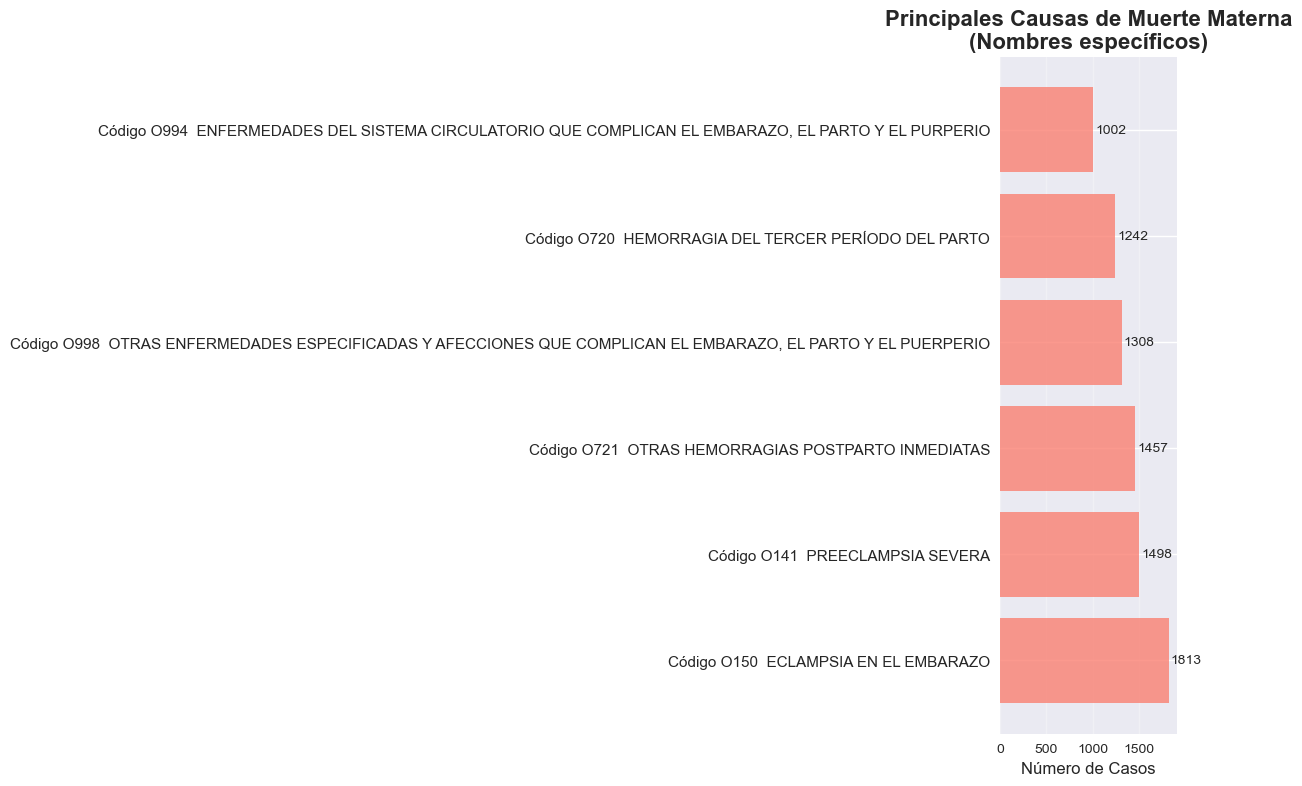

PRINCIPALES CAUSAS DE MUERTE:
1. Código O150  ECLAMPSIA EN EL EMBARAZO
   1,813 casos (7.8%)
2. Código O141  PREECLAMPSIA SEVERA
   1,498 casos (6.5%)
3. Código O721  OTRAS HEMORRAGIAS POSTPARTO INMEDIATAS
   1,457 casos (6.3%)
4. Código O998  OTRAS ENFERMEDADES ESPECIFICADAS Y AFECCIONES QUE COMPLICAN EL EMBARAZO, EL PARTO Y EL PUERPERIO
   1,308 casos (5.7%)
5. Código O720  HEMORRAGIA DEL TERCER PERÍODO DEL PARTO
   1,242 casos (5.4%)
6. Código O994  ENFERMEDADES DEL SISTEMA CIRCULATORIO QUE COMPLICAN EL EMBARAZO, EL PARTO Y EL PURPERIO
   1,002 casos (4.3%)

Gráfica guardada en en:
results/figuras/principales_causas_individual.png


In [12]:
# Principales Causas - Individual
plt.figure(figsize=(12, 8))

# Mapeo más completo de códigos CIE a nombres
mapeo_causas_completo = {
    'O150': 'Eclampsia durante el parto',
    'O720': 'Hemorragia postparto inmediato',
    'O998': 'Otras enfermedades maternas complicantes',
    'O721': 'Retención de productos de concepción',
    'O141': 'Preeclampsia severa',
    'O160': 'Hipertensión materna no especificada',
    'O151': 'Eclampsia durante el embarazo',
    'O629': 'Prolongación del embarazo no especificada',
    'O880': 'Infección de herida obstétrica',
    'O723': 'Defecto de coagulación postparto'
}

causas = df_limpio['CAUSA_CIE_4D'].value_counts().head(6)
causas_nombres_completos = []
causas_valores = []

for codigo, cantidad in causas.items():
    if codigo in mapeo_causas_completo:
        causas_nombres_completos.append(mapeo_causas_completo[codigo])
    else:
        causas_nombres_completos.append(f'Código {codigo}')
    causas_valores.append(cantidad)

bars = plt.barh(range(len(causas_valores)), causas_valores, color='salmon', alpha=0.8)
plt.title('Principales Causas de Muerte Materna\n(Nombres específicos)', fontsize=16, fontweight='bold')
plt.xlabel('Número de Casos', fontsize=12)
plt.yticks(range(len(causas_valores)), causas_nombres_completos, fontsize=11)

# Agregar valores en las barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 20, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', ha='left', va='center', fontsize=10)

plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('../results/figuras/principales_causas_individual.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# Información detallada
print("PRINCIPALES CAUSAS DE MUERTE:")
print("="*35)
for i, (nombre, cantidad) in enumerate(zip(causas_nombres_completos, causas_valores), 1):
    porcentaje = (cantidad / len(df_limpio)) * 100
    print(f"{i}. {nombre}")
    print(f"   {cantidad:,} casos ({porcentaje:.1f}%)")

print("\nGráfica guardada en en:")
print("results/figuras/principales_causas_individual.png")

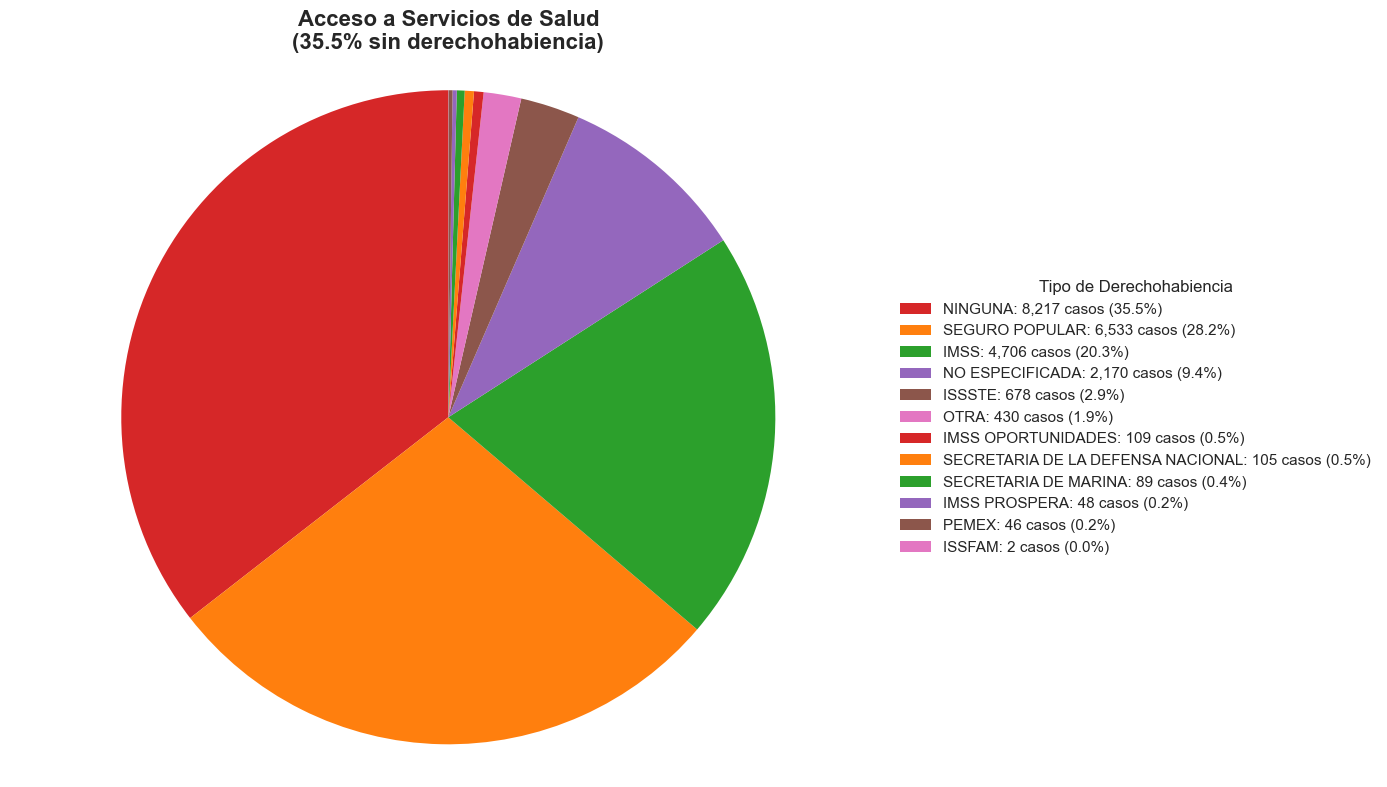

ACCESO A SERVICIOS DE SALUD:
1. NINGUNA: 8,217 casos (35.5%)
2. SEGURO POPULAR: 6,533 casos (28.2%)
3. IMSS: 4,706 casos (20.3%)
4. NO ESPECIFICADA: 2,170 casos (9.4%)
5. ISSSTE: 678 casos (2.9%)
6. OTRA: 430 casos (1.9%)
7. IMSS OPORTUNIDADES: 109 casos (0.5%)
8. SECRETARIA DE LA DEFENSA NACIONAL: 105 casos (0.5%)
9. SECRETARIA DE MARINA: 89 casos (0.4%)
10. IMSS PROSPERA: 48 casos (0.2%)
11. PEMEX: 46 casos (0.2%)
12. ISSFAM: 2 casos (0.0%)

Gráfica guardada en en:
results/figuras/acceso_servicios_individual.png


In [13]:
# Gráfica 3: Acceso a Servicios - Individual
plt.figure(figsize=(14, 8))

derechohabiencia = df_limpio['DERECHOHABIENCIAD'].value_counts()
colores_acceso = ['#d62728', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b', '#e377c2']

# Crear gráfico circular sin etiquetas
wedges, texts = plt.pie(derechohabiencia.values, 
                       colors=colores_acceso[:len(derechohabiencia)],
                       startangle=90)

# Crear leyenda externa con información completa
leyenda_labels = []
for i, (tipo, cantidad) in enumerate(derechohabiencia.items()):
    porcentaje = (cantidad / len(df_limpio)) * 100
    leyenda_labels.append(f'{tipo}: {cantidad:,} casos ({porcentaje:.1f}%)')

plt.legend(wedges, leyenda_labels, 
          loc='center left', 
          bbox_to_anchor=(1, 0.5), 
          fontsize=11,
          title='Tipo de Derechohabiencia',
          title_fontsize=12)

plt.title('Acceso a Servicios de Salud\n(35.5% sin derechohabiencia)', 
          fontsize=16, fontweight='bold')

plt.axis('equal')  # Para que el círculo se vea redondo
plt.tight_layout()
plt.savefig('../results/figuras/acceso_servicios_individual.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# Información detallada
print("ACCESO A SERVICIOS DE SALUD:")
print("="*35)
for i, (tipo, cantidad) in enumerate(derechohabiencia.items(), 1):
    porcentaje = (cantidad / len(df_limpio)) * 100
    print(f"{i}. {tipo}: {cantidad:,} casos ({porcentaje:.1f}%)")

print("\nGráfica guardada en en:")
print("results/figuras/acceso_servicios_individual.png")

In [14]:
# Preparación de Datos para Análisis Geoespacial

import pandas as pd
import os

print("="*60)
print("PREPARACIÓN DE DATOS PARA ANÁLISIS GEOESPACIAL")
print("="*60)

# 1. CREAR DATOS AGREGADOS POR ENTIDAD
print("\n1. AGREGANDO DATOS POR ENTIDAD FEDERATIVA")
print("-" * 50)

# Casos por entidad
casos_por_entidad = df_limpio.groupby('ENTIDAD_OCURRENCIAD').agg({
    'ANIO_DEFUNCION': 'count',  # Total de casos
    'EDAD': 'mean',  # Edad promedio
}).round(2)

# Renombrar columnas
casos_por_entidad.columns = ['total_casos', 'edad_promedio']

# Calcular tasa anual (promedio por año)
casos_por_entidad['tasa_anual'] = (casos_por_entidad['total_casos'] / 21).round(1)

# Casos por período
casos_2002_2005 = df_limpio[df_limpio['ANIO_DEFUNCION'].between(2002, 2005)].groupby('ENTIDAD_OCURRENCIAD').size()
casos_2018_2019 = df_limpio[df_limpio['ANIO_DEFUNCION'].between(2018, 2019)].groupby('ENTIDAD_OCURRENCIAD').size()
casos_2020_2021 = df_limpio[df_limpio['ANIO_DEFUNCION'].between(2020, 2021)].groupby('ENTIDAD_OCURRENCIAD').size()

# Agregar a la tabla principal
casos_por_entidad['casos_2002_2005'] = casos_2002_2005
casos_por_entidad['casos_2018_2019'] = casos_2018_2019
casos_por_entidad['casos_2020_2021'] = casos_2020_2021

# Rellenar valores faltantes con 0
casos_por_entidad = casos_por_entidad.fillna(0)

# Calcular cambios porcentuales
casos_por_entidad['cambio_historico'] = ((casos_por_entidad['casos_2018_2019'] - casos_por_entidad['casos_2002_2005']) / casos_por_entidad['casos_2002_2005'] * 100).round(1)
casos_por_entidad['impacto_covid'] = ((casos_por_entidad['casos_2020_2021'] - casos_por_entidad['casos_2018_2019']) / casos_por_entidad['casos_2018_2019'] * 100).round(1)

# Reemplazar infinitos y NaN con 0
casos_por_entidad = casos_por_entidad.replace([float('inf'), -float('inf')], 0)
casos_por_entidad = casos_por_entidad.fillna(0)

print(f"Datos agregados para {len(casos_por_entidad)} entidades:")
print(casos_por_entidad.head(10))

# 2. CREAR DATOS POR MUNICIPIO (TOP 50)
print("\n2. AGREGANDO DATOS POR MUNICIPIO (TOP 50)")
print("-" * 50)

casos_por_municipio = df_limpio.groupby(['ENTIDAD_OCURRENCIAD', 'MUNICIPIO_OCURRENCIAD']).agg({
    'ANIO_DEFUNCION': 'count',
    'EDAD': 'mean'
}).round(2)

casos_por_municipio.columns = ['total_casos', 'edad_promedio']
casos_por_municipio['tasa_anual'] = (casos_por_municipio['total_casos'] / 21).round(1)

# Ordenar y tomar top 50
casos_por_municipio = casos_por_municipio.sort_values('total_casos', ascending=False).head(50)

print(f"Top 10 municipios con mayor mortalidad materna:")
for i, (idx, row) in enumerate(casos_por_municipio.head(10).iterrows(), 1):
    entidad, municipio = idx
    print(f"  {i:2d}. {municipio}, {entidad}: {row['total_casos']:.0f} casos")

# 3. ANÁLISIS POR ACCESO A SERVICIOS POR ENTIDAD
print("\n3. ANÁLISIS DE ACCESO A SERVICIOS POR ENTIDAD")
print("-" * 50)

acceso_por_entidad = df_limpio.groupby('ENTIDAD_OCURRENCIAD').agg({
    'DERECHOHABIENCIAD': lambda x: (x == 'NINGUNA').sum(),  # Sin derechohabiencia
    'SITIO_DEFUNCIOND': lambda x: (x == 'HOGAR').sum(),  # Muertes en hogar
    'ESCOLARIDADD': lambda x: (x.isin(['NINGUNA', 'PRIMARIA INCOMPLETA', 'PRIMARIA COMPLETA'])).sum()  # Educación baja
})

acceso_por_entidad.columns = ['sin_derechohabiencia', 'muertes_hogar', 'educacion_baja']

# Calcular porcentajes
for col in ['sin_derechohabiencia', 'muertes_hogar', 'educacion_baja']:
    acceso_por_entidad[f'{col}_pct'] = (acceso_por_entidad[col] / casos_por_entidad['total_casos'] * 100).round(1)

print("Top 5 entidades con mayor porcentaje sin derechohabiencia:")
top_sin_derecho = acceso_por_entidad.sort_values('sin_derechohabiencia_pct', ascending=False).head(5)
for entidad, row in top_sin_derecho.iterrows():
    print(f"  {entidad}: {row['sin_derechohabiencia_pct']:.1f}%")

# 4. GUARDAR DATOS PARA QGIS
print("\n4. GUARDANDO DATOS PARA ANÁLISIS EN QGIS")
print("-" * 50)

# Guardar datos por entidad
casos_por_entidad_export = casos_por_entidad.reset_index()
casos_por_entidad_export.to_csv('../datos/qgis/mortalidad_por_entidad.csv', index=False, encoding='utf-8')
print("Archivo guardado: datos/qgis/mortalidad_por_entidad.csv")

# Guardar datos por municipio
casos_por_municipio_export = casos_por_municipio.reset_index()
casos_por_municipio_export.to_csv('../datos/qgis/mortalidad_por_municipio_top50.csv', index=False, encoding='utf-8')
print("Archivo guardado: datos/qgis/mortalidad_por_municipio_top50.csv")

# Guardar datos de acceso
acceso_export = acceso_por_entidad.reset_index()
acceso_export.to_csv('../datos/qgis/acceso_servicios_por_entidad.csv', index=False, encoding='utf-8')
print("Archivo guardado: datos/qgis/acceso_servicios_por_entidad.csv")

# 5. CREAR TABLA RESUMEN PARA QGIS
print("\n5. CREANDO TABLA RESUMEN INTEGRADA")
print("-" * 50)

# Combinar todas las métricas en una sola tabla
tabla_completa = casos_por_entidad.join(acceso_por_entidad, how='outer').fillna(0)

# Añadir categorías para facilitar la visualización
tabla_completa['categoria_casos'] = pd.cut(tabla_completa['total_casos'], 
                                          bins=[0, 100, 500, 1000, 3000], 
                                          labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto'])

tabla_completa['categoria_sin_derecho'] = pd.cut(tabla_completa['sin_derechohabiencia_pct'], 
                                                 bins=[0, 20, 40, 60, 100], 
                                                 labels=['Bajo', 'Medio', 'Alto', 'Muy Alto'])

# Guardar tabla completa
tabla_completa_export = tabla_completa.reset_index()
tabla_completa_export.to_csv('../datos/qgis/tabla_completa_entidades.csv', index=False, encoding='utf-8')
print("Archivo guardado: datos/qgis/tabla_completa_entidades.csv")

print(f"\nTabla completa con {len(tabla_completa)} entidades y {len(tabla_completa.columns)} variables")
print("\nPrimeras 5 entidades de la tabla completa:")
print(tabla_completa.head())

print("\n" + "="*60)
print("DATOS PREPARADOS PARA QGIS")
print("="*60)
print("Archivos generados en la carpeta 'datos/qgis/':")
print("1. mortalidad_por_entidad.csv - Datos básicos por entidad")
print("2. mortalidad_por_municipio_top50.csv - Top 50 municipios") 
print("3. acceso_servicios_por_entidad.csv - Indicadores de acceso")
print("4. tabla_completa_entidades.csv - Datos integrados para mapas")
print("\nEstos archivos están listos para importar en QGIS")

PREPARACIÓN DE DATOS PARA ANÁLISIS GEOESPACIAL

1. AGREGANDO DATOS POR ENTIDAD FEDERATIVA
--------------------------------------------------
Datos agregados para 33 entidades:
                      total_casos  edad_promedio  tasa_anual  casos_2002_2005  \
ENTIDAD_OCURRENCIAD                                                             
AGUASCALIENTES                215          29.03        10.2               35   
BAJA CALIFORNIA               543          27.53        25.9              100   
BAJA CALIFORNIA SUR            91          27.88         4.3               24   
CAMPECHE                      160          27.44         7.6               36   
CHIAPAS                      1567          28.39        74.6              373   
CHIHUAHUA                     881          31.52        42.0              169   
CIUDAD DE MÉXICO             2392          28.96       113.9              617   
COAHUILA DE ZARAGOZA          467          27.88        22.2               82   
COLIMA        

In [15]:
# Configuración de directorios para shapefiles de México
import os

# Obtener directorio del proyecto (un nivel arriba de notebooks)
directorio_proyecto = os.path.dirname(os.getcwd())
ruta_shapefiles = os.path.join(directorio_proyecto, 'datos', 'shapefiles_qgis')

# Crear directorio para shapefiles si no existe
os.makedirs(ruta_shapefiles, exist_ok=True)

print(f"Directorio: {ruta_shapefiles}")
print("\nDescargar desde: https://gadm.org/download_country.html")
print("Buscar: Mexico → Shapefile → Level 1")
print(f"Extraer archivo ZIP en: {ruta_shapefiles}")

# Definir archivo principal esperado
archivo_principal = "gadm41_MEX_1.shp"
ruta_completa = os.path.join(ruta_shapefiles, archivo_principal)

# Función para verificar si la descarga fue exitosa
def verificar_descarga_gadm():
    if not os.path.exists(ruta_shapefiles):
        return False
    
    archivos_presentes = os.listdir(ruta_shapefiles)
    
    if not archivos_presentes:
        print("Directorio vacío. Extraer archivos del ZIP.")
        return False
    
    print("Archivos encontrados:")
    for archivo in sorted(archivos_presentes):
        print(f"  - {archivo}")
    
    if archivo_principal in archivos_presentes:
        print(f"\nEXITO: {archivo_principal} listo para QGIS")
        print(f"Ruta: {ruta_completa}")
        return True
    else:
        print(f"\nFalta: {archivo_principal}")
        print("Verificar que la descarga y extracción se completaron correctamente")
        return False

# Ejecutar verificación
verificar_descarga_gadm()

Directorio: C:\Users\olimp\Documents\mortalidad_materna_proyecto\datos\shapefiles_qgis

Descargar desde: https://gadm.org/download_country.html
Buscar: Mexico → Shapefile → Level 1
Extraer archivo ZIP en: C:\Users\olimp\Documents\mortalidad_materna_proyecto\datos\shapefiles_qgis
Archivos encontrados:
  - gadm41_MEX_0.cpg
  - gadm41_MEX_0.dbf
  - gadm41_MEX_0.prj
  - gadm41_MEX_0.shp
  - gadm41_MEX_0.shx
  - gadm41_MEX_1.cpg
  - gadm41_MEX_1.dbf
  - gadm41_MEX_1.prj
  - gadm41_MEX_1.shp
  - gadm41_MEX_1.shx
  - gadm41_MEX_2.cpg
  - gadm41_MEX_2.dbf
  - gadm41_MEX_2.prj
  - gadm41_MEX_2.shp
  - gadm41_MEX_2.shx
  - gadm41_MEX_shp.zip

EXITO: gadm41_MEX_1.shp listo para QGIS
Ruta: C:\Users\olimp\Documents\mortalidad_materna_proyecto\datos\shapefiles_qgis\gadm41_MEX_1.shp


True

In [16]:
# Solución para problema de pyarrow - usar solo os
import os

# Verificar que los datos existen usando os directamente
directorio_proyecto = os.path.dirname(os.getcwd())
ruta_datos = os.path.join(directorio_proyecto, 'datos', 'qgis', 'tabla_completa_entidades.csv')

# Verificar si el archivo existe
if os.path.exists(ruta_datos):
    print(f"EXITO: Archivo de datos encontrado")
    print(f"Ruta: {ruta_datos}")
    print("\nEl archivo está listo para cargar en QGIS")
else:
    print("ERROR: No se encuentra el archivo de datos")
    print("Verificar que se ejecutó la preparación de datos anteriormente")

EXITO: Archivo de datos encontrado
Ruta: C:\Users\olimp\Documents\mortalidad_materna_proyecto\datos\qgis\tabla_completa_entidades.csv

El archivo está listo para cargar en QGIS


In [17]:
# Verificar nombres usando solo archivos CSV
import os

directorio_proyecto = os.path.dirname(os.getcwd())

# Cargar datos de mortalidad
ruta_datos = os.path.join(directorio_proyecto, 'datos', 'qgis', 'tabla_completa_entidades.csv')

print("NOMBRES EN DATOS DE MORTALIDAD:")
with open(ruta_datos, 'r', encoding='utf-8') as f:
    lines = f.readlines()
    
# Obtener nombres de entidades (columna 0)
entidades_mortalidad = []
for line in lines[1:]:  # Saltar header
    entidad = line.split(',')[0].strip().strip('"')
    if entidad not in entidades_mortalidad:
        entidades_mortalidad.append(entidad)

for i, entidad in enumerate(sorted(entidades_mortalidad), 1):
    print(f"{i:2d}. {entidad}")

print(f"\nTotal entidades en datos de mortalidad: {len(entidades_mortalidad)}")

NOMBRES EN DATOS DE MORTALIDAD:
 1. AGUASCALIENTES
 2. BAJA CALIFORNIA
 3. BAJA CALIFORNIA SUR
 4. CAMPECHE
 5. CHIAPAS
 6. CHIHUAHUA
 7. CIUDAD DE MÉXICO
 8. COAHUILA DE ZARAGOZA
 9. COLIMA
10. DURANGO
11. ESTADOS UNIDOS DE NORTEAMÉRICA
12. GUANAJUATO
13. GUERRERO
14. HIDALGO
15. JALISCO
16. MICHOACÁN DE OCAMPO
17. MORELOS
18. MÉXICO
19. NAYARIT
20. NUEVO LEÓN
21. OAXACA
22. PUEBLA
23. QUERÉTARO
24. QUINTANA ROO
25. SAN LUIS POTOSÍ
26. SINALOA
27. SONORA
28. TABASCO
29. TAMAULIPAS
30. TLAXCALA
31. VERACRUZ DE IGNACIO DE LA LLAVE
32. YUCATÁN
33. ZACATECAS

Total entidades en datos de mortalidad: 33


In [18]:
# Crear tabla de mapeo para unión correcta
import os

# Mapeo entre nombres en datos de mortalidad y shapefile
mapeo_nombres = {
    'AGUASCALIENTES': 'Aguascalientes',
    'BAJA CALIFORNIA': 'Baja California', 
    'BAJA CALIFORNIA SUR': 'Baja California Sur',
    'CAMPECHE': 'Campeche',
    'CHIAPAS': 'Chiapas',
    'CHIHUAHUA': 'Chihuahua',
    'CIUDAD DE MÉXICO': 'Distrito Federal',
    'COAHUILA DE ZARAGOZA': 'Coahuila',
    'COLIMA': 'Colima',
    'DURANGO': 'Durango',
    'GUANAJUATO': 'Guanajuato',
    'GUERRERO': 'Guerrero',
    'HIDALGO': 'Hidalgo',
    'JALISCO': 'Jalisco',
    'MICHOACÁN DE OCAMPO': 'Michoacán',
    'MORELOS': 'Morelos',
    'MÉXICO': 'México',
    'NAYARIT': 'Nayarit',
    'NUEVO LEÓN': 'Nuevo León',
    'OAXACA': 'Oaxaca',
    'PUEBLA': 'Puebla',
    'QUERÉTARO': 'Querétaro',
    'QUINTANA ROO': 'Quintana Roo',
    'SAN LUIS POTOSÍ': 'San Luis Potosí',
    'SINALOA': 'Sinaloa',
    'SONORA': 'Sonora',
    'TABASCO': 'Tabasco',
    'TAMAULIPAS': 'Tamaulipas',
    'TLAXCALA': 'Tlaxcala',
    'VERACRUZ DE IGNACIO DE LA LLAVE': 'Veracruz',
    'YUCATÁN': 'Yucatán',
    'ZACATECAS': 'Zacatecas'
}

# Crear archivo corregido
directorio_proyecto = os.path.dirname(os.getcwd())
ruta_original = os.path.join(directorio_proyecto, 'datos', 'qgis', 'tabla_completa_entidades.csv')
ruta_corregida = os.path.join(directorio_proyecto, 'datos', 'qgis', 'mortalidad_nombres_corregidos.csv')

# Leer archivo original y corregir nombres
with open(ruta_original, 'r', encoding='utf-8') as f_in:
    lines = f_in.readlines()

# Escribir archivo corregido
with open(ruta_corregida, 'w', encoding='utf-8') as f_out:
    # Escribir header
    f_out.write(lines[0])
    
    # Corregir cada línea
    for line in lines[1:]:
        parts = line.strip().split(',')
        entidad_original = parts[0].strip().strip('"')
        
        # Mapear nombre si existe, sino mantener original
        if entidad_original in mapeo_nombres:
            parts[0] = mapeo_nombres[entidad_original]
        
        # Escribir línea corregida
        f_out.write(','.join(parts) + '\n')

print(f"Archivo corregido creado: {ruta_corregida}")

Archivo corregido creado: C:\Users\olimp\Documents\mortalidad_materna_proyecto\datos\qgis\mortalidad_nombres_corregidos.csv


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

print("ANÁLISIS DE CLUSTERING ESPACIAL")
print("="*50)

# Cargar datos con información de clusters geográficos
directorio_proyecto = os.path.dirname(os.getcwd())
ruta_datos = os.path.join(directorio_proyecto, 'datos', 'qgis', 'tabla_completa_entidades.csv')
df = pd.read_csv(ruta_datos)

# Variables para clustering (basadas en tus mapas)
variables_cluster = ['total_casos', 'tasa_anual', 'edad_promedio', 'sin_derechohabiencia_pct']

# Preparar datos para clustering
X = df[variables_cluster].fillna(0)

print(f"Analizando {len(df)} entidades con {len(variables_cluster)} variables")
print("\nEstadísticas de variables:")
print(X.describe().round(1))

# Normalizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar clustering con 4 grupos
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df['cluster_geografico'] = clusters

print(f"\nEntidades por cluster:")
for i in range(4):
    estados_cluster = df[df['cluster_geografico'] == i]['ENTIDAD_OCURRENCIAD'].tolist()
    print(f"\nCluster {i} ({len(estados_cluster)} estados):")
    print(f"Estados: {', '.join(estados_cluster)}")

ANÁLISIS DE CLUSTERING ESPACIAL
Analizando 33 entidades con 4 variables

Estadísticas de variables:
       total_casos  tasa_anual  edad_promedio  sin_derechohabiencia_pct
count         33.0        33.0           33.0                      33.0
mean         701.0        33.4           29.1                      31.7
std          622.7        29.7            1.2                       9.0
min            3.0         0.1           27.4                      15.6
25%          276.0        13.1           28.4                      25.3
50%          486.0        23.1           29.0                      31.8
75%          938.0        44.7           29.6                      41.1
max         2551.0       121.5           32.0                      44.8

Entidades por cluster:

Cluster 0 (13 estados):
Estados: AGUASCALIENTES, BAJA CALIFORNIA, BAJA CALIFORNIA SUR, CAMPECHE, COAHUILA DE ZARAGOZA, COLIMA, NAYARIT, NUEVO LEÓN, QUINTANA ROO, SINALOA, SONORA, YUCATÁN, ZACATECAS

Cluster 1 (10 estados):
Esta

ANÁLISIS DE CARACTERÍSTICAS POR CLUSTER

Características promedio por cluster:
                    total_casos  tasa_anual  edad_promedio  \
cluster_geografico                                           
0                         325.1        15.5           28.1   
1                         734.6        35.0           29.4   
2                         431.4        20.5           31.1   
3                        1880.8        89.6           28.9   

                    sin_derechohabiencia_pct  
cluster_geografico                            
0                                       24.4  
1                                       37.4  
2                                       29.2  
3                                       42.1  

INTERPRETACIÓN DE CLUSTERS:
Cluster 0: Estados del Norte/Noreste - Baja mortalidad, mejor acceso
Cluster 1: Estados del Centro-Occidente - Mortalidad media
Cluster 2: Estados Fronterizos/Diversos - Características mixtas
Cluster 3: Estados Grandes/Poblados - Alta m

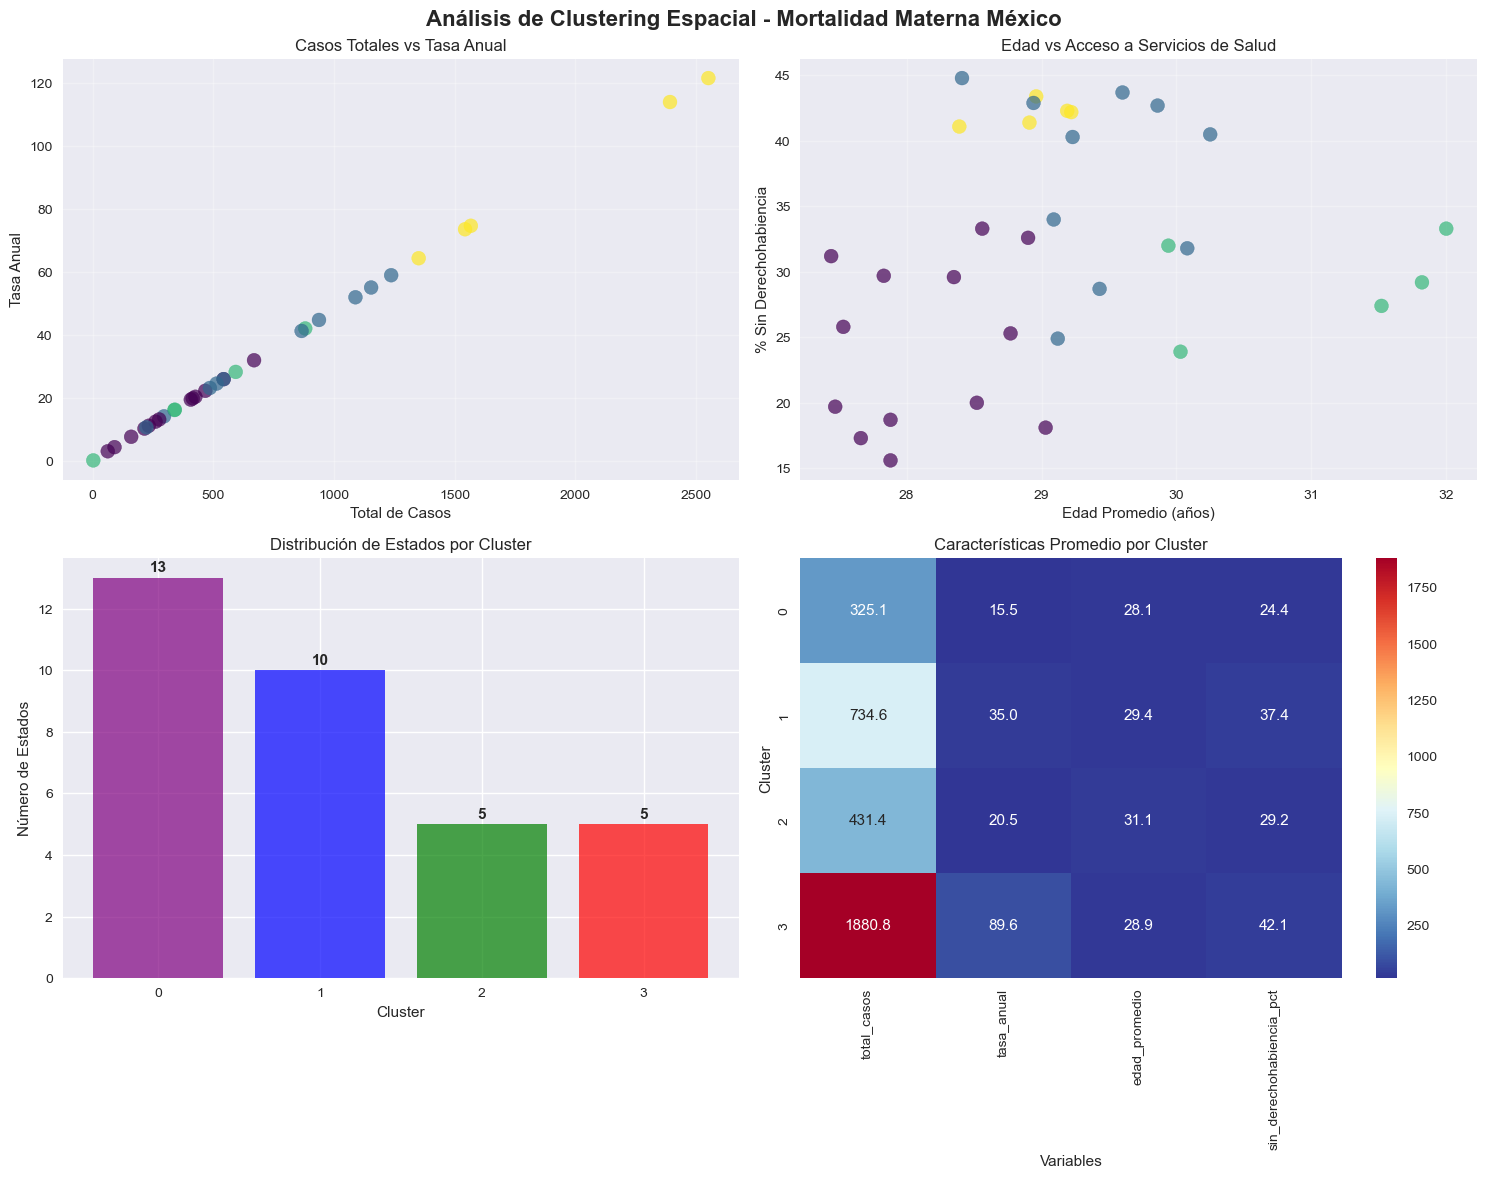


Archivos guardados exitosamente:
  • Gráfico: C:\Users\olimp\Documents\mortalidad_materna_proyecto\results\figuras\clustering_completo_mortalidad.png
  • Datos: C:\Users\olimp\Documents\mortalidad_materna_proyecto\datos\processed\entidades_con_clusters.csv
Análisis de clustering completado


In [20]:
# Continuar con visualizaciones del clustering
import seaborn as sns

print("ANÁLISIS DE CARACTERÍSTICAS POR CLUSTER")
print("="*45)

# Crear directorios necesarios
directorio_proyecto = os.path.dirname(os.getcwd())
ruta_figuras = os.path.join(directorio_proyecto, 'results', 'figuras')
ruta_processed = os.path.join(directorio_proyecto, 'datos', 'processed')
os.makedirs(ruta_figuras, exist_ok=True)
os.makedirs(ruta_processed, exist_ok=True)

# Calcular estadísticas por cluster
cluster_stats = df.groupby('cluster_geografico')[variables_cluster].mean().round(1)
print("\nCaracterísticas promedio por cluster:")
print(cluster_stats)

# Interpretar clusters
interpretaciones = {
   0: "Estados del Norte/Noreste - Baja mortalidad, mejor acceso",
   1: "Estados del Centro-Occidente - Mortalidad media", 
   2: "Estados Fronterizos/Diversos - Características mixtas",
   3: "Estados Grandes/Poblados - Alta mortalidad total"
}

print(f"\nINTERPRETACIÓN DE CLUSTERS:")
for cluster_id, descripcion in interpretaciones.items():
   print(f"Cluster {cluster_id}: {descripcion}")

# Crear visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis de Clustering Espacial - Mortalidad Materna México', fontsize=16, fontweight='bold')

# Gráfico 1: Total casos vs Tasa anual
ax1 = axes[0, 0]
scatter1 = ax1.scatter(df['total_casos'], df['tasa_anual'], c=df['cluster_geografico'], 
                     cmap='viridis', s=100, alpha=0.7)
ax1.set_xlabel('Total de Casos')
ax1.set_ylabel('Tasa Anual')
ax1.set_title('Casos Totales vs Tasa Anual')
ax1.grid(True, alpha=0.3)

# Gráfico 2: Edad promedio vs Sin derechohabiencia
ax2 = axes[0, 1]
scatter2 = ax2.scatter(df['edad_promedio'], df['sin_derechohabiencia_pct'], 
                     c=df['cluster_geografico'], cmap='viridis', s=100, alpha=0.7)
ax2.set_xlabel('Edad Promedio (años)')
ax2.set_ylabel('% Sin Derechohabiencia')
ax2.set_title('Edad vs Acceso a Servicios de Salud')
ax2.grid(True, alpha=0.3)

# Gráfico 3: Distribución de clusters
ax3 = axes[1, 0]
cluster_counts = df['cluster_geografico'].value_counts().sort_index()
colors = ['purple', 'blue', 'green', 'red']
bars = ax3.bar(range(4), cluster_counts.values, color=colors, alpha=0.7)
ax3.set_xlabel('Cluster')
ax3.set_ylabel('Número de Estados')
ax3.set_title('Distribución de Estados por Cluster')
ax3.set_xticks(range(4))

# Añadir valores en las barras
for i, bar in enumerate(bars):
   height = bar.get_height()
   ax3.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Gráfico 4: Heatmap de características
ax4 = axes[1, 1]
sns.heatmap(cluster_stats, annot=True, fmt='.1f', cmap='RdYlBu_r', ax=ax4)
ax4.set_title('Características Promedio por Cluster')
ax4.set_xlabel('Variables')
ax4.set_ylabel('Cluster')

plt.tight_layout()

# Guardar figura con ruta completa
ruta_imagen = os.path.join(ruta_figuras, 'clustering_completo_mortalidad.png')
plt.savefig(ruta_imagen, dpi=300, bbox_inches='tight')
plt.show()

# Guardar resultados con clusters
archivo_con_clusters = os.path.join(ruta_processed, 'entidades_con_clusters.csv')
df.to_csv(archivo_con_clusters, index=False, encoding='utf-8')

print(f"\nArchivos guardados exitosamente:")
print(f"  • Gráfico: {ruta_imagen}")
print(f"  • Datos: {archivo_con_clusters}")
print("Análisis de clustering completado")

ANÁLISIS DE SERIES TEMPORALES POR CLUSTER
Datos originales cargados: 23133 registros
Clusters disponibles: 33 entidades
Registros sin cluster asignado: 0
Análisis temporal: 84 puntos de datos


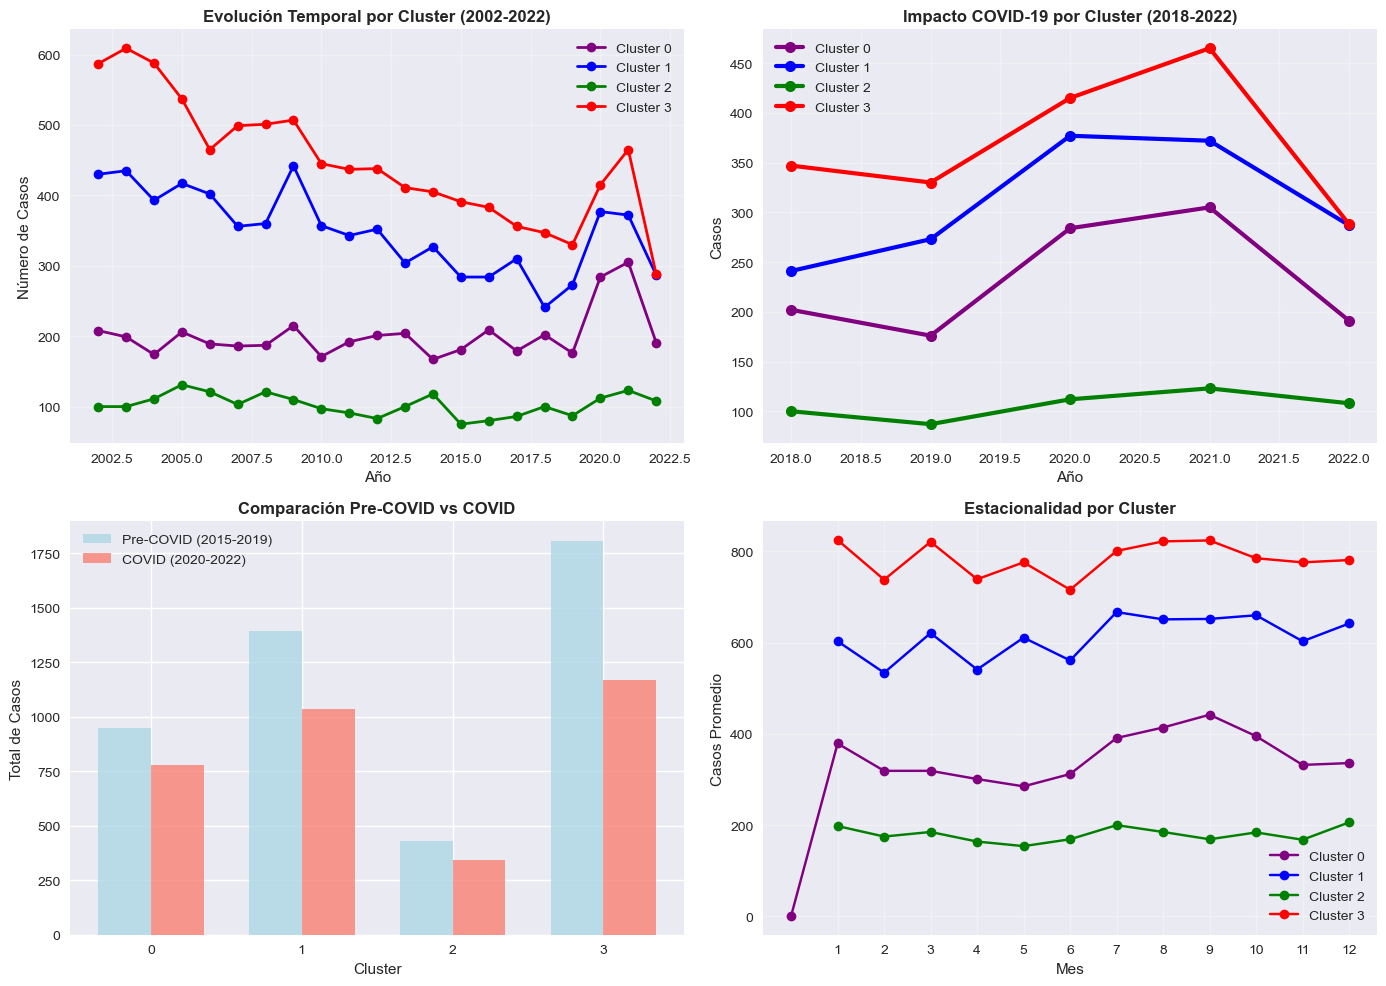

Análisis de series temporales completado


In [21]:
# Análisis de series temporales por cluster - CORREGIDO
print("ANÁLISIS DE SERIES TEMPORALES POR CLUSTER")
print("="*50)

# Cargar datos originales limpios (usar read_excel para .xlsx)
df_original = pd.read_excel(os.path.join(directorio_proyecto, 'datos', 'processed', 'mortalidad_materna_limpio.xlsx'))

# Unir con información de clusters
df_clusters = pd.read_csv(os.path.join(directorio_proyecto, 'datos', 'processed', 'entidades_con_clusters.csv'))
mapeo_clusters = dict(zip(df_clusters['ENTIDAD_OCURRENCIAD'], df_clusters['cluster_geografico']))

print(f"Datos originales cargados: {len(df_original)} registros")
print(f"Clusters disponibles: {len(df_clusters)} entidades")

# Agregar cluster a datos originales
df_original['cluster'] = df_original['ENTIDAD_OCURRENCIAD'].map(mapeo_clusters)

# Verificar que la unión funcionó
casos_sin_cluster = df_original['cluster'].isnull().sum()
print(f"Registros sin cluster asignado: {casos_sin_cluster}")

# Remover registros sin cluster
df_original = df_original[df_original['cluster'].notna()]

# Análisis temporal por cluster
casos_por_año_cluster = df_original.groupby(['ANIO_DEFUNCION', 'cluster']).size().reset_index(name='casos')

print(f"Análisis temporal: {len(casos_por_año_cluster)} puntos de datos")

# Crear visualización temporal
plt.figure(figsize=(14, 10))

# Gráfico principal: tendencias por cluster
plt.subplot(2, 2, 1)
colors = ['purple', 'blue', 'green', 'red']
for cluster in range(4):
    data_cluster = casos_por_año_cluster[casos_por_año_cluster['cluster'] == cluster]
    if len(data_cluster) > 0:
        plt.plot(data_cluster['ANIO_DEFUNCION'], data_cluster['casos'], 
                 marker='o', linewidth=2, label=f'Cluster {cluster}', color=colors[cluster])

plt.title('Evolución Temporal por Cluster (2002-2022)', fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Número de Casos')
plt.legend()
plt.grid(True, alpha=0.3)

# Período COVID por cluster
plt.subplot(2, 2, 2)
años_covid = [2018, 2019, 2020, 2021, 2022]
for cluster in range(4):
    data_cluster = casos_por_año_cluster[
        (casos_por_año_cluster['cluster'] == cluster) & 
        (casos_por_año_cluster['ANIO_DEFUNCION'].isin(años_covid))
    ]
    if len(data_cluster) > 0:
        plt.plot(data_cluster['ANIO_DEFUNCION'], data_cluster['casos'], 
                 marker='o', linewidth=3, markersize=8, label=f'Cluster {cluster}', color=colors[cluster])

plt.title('Impacto COVID-19 por Cluster (2018-2022)', fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Casos')
plt.legend()
plt.grid(True, alpha=0.3)

# Comparación pre/post COVID
plt.subplot(2, 2, 3)
pre_covid = df_original[df_original['ANIO_DEFUNCION'].between(2015, 2019)].groupby('cluster').size()
post_covid = df_original[df_original['ANIO_DEFUNCION'].between(2020, 2022)].groupby('cluster').size()

x = range(4)
width = 0.35
plt.bar([i - width/2 for i in x], pre_covid.reindex(range(4), fill_value=0).values, 
        width, label='Pre-COVID (2015-2019)', alpha=0.8, color='lightblue')
plt.bar([i + width/2 for i in x], post_covid.reindex(range(4), fill_value=0).values, 
        width, label='COVID (2020-2022)', alpha=0.8, color='salmon')

plt.title('Comparación Pre-COVID vs COVID', fontweight='bold')
plt.xlabel('Cluster')
plt.ylabel('Total de Casos')
plt.legend()
plt.xticks(x)

# Análisis estacional
plt.subplot(2, 2, 4)
casos_por_mes = df_original.groupby(['MES_DEFUNCION', 'cluster']).size().reset_index(name='casos')
for cluster in range(4):
    data_cluster = casos_por_mes[casos_por_mes['cluster'] == cluster]
    if len(data_cluster) > 0:
        plt.plot(data_cluster['MES_DEFUNCION'], data_cluster['casos'], 
                 marker='o', label=f'Cluster {cluster}', color=colors[cluster])

plt.title('Estacionalidad por Cluster', fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Casos Promedio')
plt.legend()
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(ruta_figuras, 'series_temporales_clusters.png'), dpi=300, bbox_inches='tight')
plt.show()

print("Análisis de series temporales completado")